In [1]:
import pandas as pd
import numpy as np
import pyproj

In [2]:
상업환승 = pd.read_csv("data/subway_group/group0_1819.csv").drop({'Unnamed: 0'}, axis=1)

In [3]:
상업환승

,사용일자,노선명,역명,승차총승객수,하차총승객수,총승객수,TM_X,TM_Y,노선수,출입구,...,총집객시설,교육/보건,산업,숙박/음식,행정,레저/관광/예술,영화관 개수,백화점,버스 정류장 개수,공원 개수
0,2018-01-01,2호선,강변(동서울터미널),37348.0,33026.0,70374.0,208367.2887,548408.9657,1.0,4.0,...,22,12,5,0,1,2,2,0,12,0.0
1,2018-01-02,2호선,강변(동서울터미널),47562.0,45693.0,93255.0,208367.2887,548408.9657,1.0,4.0,...,22,12,5,0,1,2,2,0,12,0.0
2,2018-01-03,2호선,강변(동서울터미널),45040.0,44074.0,89114.0,208367.2887,548408.9657,1.0,4.0,...,22,12,5,0,1,2,2,0,12,0.0
3,2018-01-04,2호선,강변(동서울터미널),45680.0,44419.0,90099.0,208367.2887,548408.9657,1.0,4.0,...,22,12,5,0,1,2,2,0,12,0.0
4,2018-01-05,2호선,강변(동서울터미널),51823.0,50127.0,101950.0,208367.2887,548408.9657,1.0,4.0,...,22,12,5,0,1,2,2,0,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56511,2019-10-01,경의선,홍대입구,2165.0,2494.0,4659.0,193407.6064,550859.6077,3.0,9.0,...,82,53,7,15,0,7,2,0,30,0.0
56512,2019-10-01,공항철도 1호선,홍대입구,12261.0,12015.0,24276.0,193407.6064,550859.6077,3.0,9.0,...,82,53,7,15,0,7,2,0,30,0.0
56513,2019-10-01,2호선,홍대입구,74428.0,78451.0,152879.0,193407.6064,550859.6077,3.0,9.0,...,82,53,7,15,0,7,2,0,30,0.0
56514,2019-10-02,경의선,홍대입구,2154.0,2790.0,4944.0,193407.6064,550859.6077,3.0,9.0,...,82,53,7,15,0,7,2,0,30,0.0


In [4]:
#넣으면서 생긴 의미 없는 컬럼 삭제, 수정

#group1_1819 = g roup1_1819.drop("총승객수_y", axis = 1)
상업환승 = 상업환승.rename(columns={'총승객수_x' : '총승객수'})
상업환승 = 상업환승.rename(columns={'평균기온(°C)':'평균기온'})
상업환승 = 상업환승.rename(columns={'최저기온(°C)':'최저기온'})
상업환승 = 상업환승.rename(columns={'최고기온(°C)':'최고기온'})
상업환승 = 상업환승.rename(columns={'일강수량(mm)':'일강수량'})
상업환승 = 상업환승.rename(columns={'최대 풍속(m/s)':'최대풍속'})
상업환승 = 상업환승.rename(columns={'평균 풍속(m/s)':'평균풍속'})

In [5]:
상업환승['일강수량'] = 상업환승['일강수량'].fillna(0)

In [6]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# 사용자 운영체제 확인
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

# 9호선 평균 인원

In [14]:
상업환승 = pd.read_csv("data/상업환승.csv").drop({'Unnamed: 0'}, axis=1)
업무주거 = pd.read_csv("data/업무주거.csv").drop({'Unnamed: 0'}, axis=1)

In [17]:
상업환승[상업환승['역명'] == '고덕'].groupby('역명').mean()

,승차총승객수,하차총승객수,총승객수,TM_X,TM_Y,노선수,출입구,학생수,대학생수,year,...,행정,레저/관광/예술,영화관 개수,백화점,버스정류장,공원 개수,누적휴일,계절,1일우량,기온
역명,,,,,,,,,,,,,,,,,,,,,
고덕,9695.767123,9407.832877,19103.6,213619.2393,550625.3421,1.0,5.0,2247.0,0.0,2018.5,...,0.5,0.5,0.0,0.0,17.5,0.0,0.50274,2.490411,1.339726,0.057534


In [8]:
상업환승 = 상업환승[상업환승['노선명'] == '9호선']
업무주거 = 업무주거[업무주거['노선명'] == '9호선']

In [9]:
상_9 = 상업환승[['역명',  '총승객수']].groupby('역명').mean().reset_index()
업_9 = 업무주거[['역명',  '총승객수']].groupby('역명').mean().reset_index()

In [10]:
총 = 상_9.append(업_9)

C:\Users\lhj\AppData\Local\Temp\ipykernel_23376\3078018143.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  총 = 상_9.append(업_9)


In [11]:
총.mean()

C:\Users\lhj\AppData\Local\Temp\ipykernel_23376\2083447377.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  총.mean()


총승객수    27490.540236
dtype: float64

,역명,총승객수
0,고속터미널,35335.220548
1,김포공항,21839.842466
2,당산,36052.091781
3,동작(현충원),3842.500000
0,여의도,40383.046385


In [12]:
총.mean()

C:\Users\lhj\AppData\Local\Temp\ipykernel_23376\2083447377.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  총.mean()


총승객수    27490.540236
dtype: float64

# 지하철 그룹별 위치 시각화

In [78]:
업무주거 = pd.read_csv("data/업무주거.csv").drop({'Unnamed: 0'}, axis=1)

In [79]:
상업환승 = pd.read_csv("data/상업환승.csv").drop({'Unnamed: 0'}, axis=1)

In [80]:
#업무주거 경도 위도 변환

In [81]:
업무주거 = 업무주거[['역명', 'TM_X', 'TM_Y']]

In [82]:
업무주거_xy = 업무주거[['TM_X', 'TM_Y']]

In [83]:
# TM -> 위경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [84]:
coord = np.array(업무주거_xy)
coord.shape
#coord[:5]

(103962, 2)

In [85]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[126.882357 ,  37.4811276],
       [126.882357 ,  37.4811276],
       [126.882357 ,  37.4811276],
       [126.882357 ,  37.4811276],
       [126.882357 ,  37.4811276]])

In [86]:
업무주거["위도"] = result_imt[:, 1]
업무주거["경도"] = result_imt[:, 0]
업무주거 = 업무주거.drop(['TM_X', 'TM_Y'], axis = 1)
업무주거 = 업무주거.reset_index().drop('index', axis=  1)

In [87]:
업무주거 = 업무주거.groupby('역명').mean()
업무주거 = 업무주거.reset_index()

In [88]:
#상업환승 경도 위도 변환

In [89]:
상업환승 = 상업환승[['역명', 'TM_X', 'TM_Y']]

In [90]:
상업환승_xy = 상업환승[['TM_X', 'TM_Y']]

In [91]:
# TM -> 위경도 변환 함수

def project_array(coord, p1_type, p2_type):
    """
    좌표계 변환 함수
    - coord: x, y 좌표 정보가 담긴 NumPy Array
    - p1_type: 입력 좌표계 정보 ex) epsg:5186
    - p2_type: 출력 좌표계 정보 ex) epsg:4326
    """
    p1 = pyproj.Proj(init=p1_type)
    p2 = pyproj.Proj(init=p2_type)
    fx, fy = pyproj.transform(p1, p2, coord[:, 0], coord[:, 1])
    return np.dstack([fx, fy])[0]

In [92]:
coord = np.array(상업환승_xy)
coord.shape
#coord[:5]

(55056, 2)

In [93]:
# 좌표계 정보 설정
p1_type = "epsg:5186"
p2_type = "epsg:4326"

# project_array() 함수 실행
result_imt = project_array(coord, p1_type, p2_type)
result_imt[:5]

array([[127.09466973,  37.53514482],
       [127.09466973,  37.53514482],
       [127.09466973,  37.53514482],
       [127.09466973,  37.53514482],
       [127.09466973,  37.53514482]])

In [94]:
상업환승["위도"] = result_imt[:, 1]
상업환승["경도"] = result_imt[:, 0]
상업환승 = 상업환승.drop(['TM_X', 'TM_Y'], axis = 1)
상업환승 = 상업환승.reset_index().drop('index', axis=  1)

In [95]:
상업환승 = 상업환승.groupby('역명').mean()

In [96]:
상업환승 = 상업환승.reset_index()

## 그룹3개로

In [ ]:
업무 = pd.read_csv("data/업무주거.csv").drop({'Unnamed: 0'}, axis=1)
업무 = pd.read_csv("data/업무주거.csv").drop({'Unnamed: 0'}, axis=1)

In [97]:
import folium as g
from folium.plugins import MiniMap
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings('ignore')
from haversine import haversine, Unit

In [ ]:
# 앞서 구한 위도와 경도 정보를 가지고 실제 위치에 찍은 결과

for i in range(len(school_500)):
    marker01 = g.Marker([school_500.loc[i]['위도'], school_500.loc[i]['경도']],
                        popup =school_500.loc[i]['VIAT_NM'],
                        icon = g.Icon(color = 'red'))
    marker01.add_to(school_map)

c = 0
for item in group0.index:
    lat = group0.loc[item, '위도']
    long = group0.loc[item, '경도']
    g.Marker([lat, long], popup = group0.loc[c]['역명'],
                        fill = True).add_to(school_map)
    g.Circle([lat, long],radius= 500).add_to(school_map)
    c += 1
    
school_map

In [108]:
map_all = g.Map(location =[37.613333,127.030049],zoom_start = 12)
for item in 상업환승.index:
    lat = 상업환승.loc[item, '위도']
    long = 상업환승.loc[item, '경도']
    g.Marker([lat, long], fill = True, tooltip = 상업환승.loc[item, '역명']).add_to(map_all)
map_all

for item in 업무주거.index:
    lat = 업무주거.loc[item, '위도']
    long = 업무주거.loc[item, '경도']
    g.Marker([lat, long], fill = True, tooltip = 업무주거.loc[item, '역명'],
            icon = g.Icon(color = 'red')).add_to(map_all)
map_all



# 그룹0, 2,3 역 2개씩 시간별 승하차 인원

In [7]:
SEOUL19 = pd.read_csv("data/SEOUL19_df.csv")

그룹0 - 잠실(송파구청) ,건대입구
그룹2 - 신림, 서울대입구(관악구청)
그룹3 - 가산디지털단지, 강남

In [9]:
SEOUL19[SEOUL19['STN_NM'] == '강남']

,ID,STN_IDN,TGRP_CODE,STN_NM,BB_RT,US_YY_DD,PS_00TM,AG_00TM,PS_01TM,AG_01TM,...,PS_21TM,AG_21TM,PS_22TM,AG_22TM,PS_23TM,AG_23TM,PA_NM,TM_X,TM_Y,NEWFIELD1
462,463,222,지하철,강남,2호선,201906,20754,11756,1,5,...,247405,75503,270425,62699,121471,43964,5864177,202469.166,544196.93,강남2호선
690,691,222,지하철,강남,2호선,201905,22304,13700,4,83,...,267588,83052,288264,69228,128937,43752,6234453,202469.166,544196.93,강남2호선
1473,1474,222,지하철,강남,2호선,201904,21283,12826,10,128,...,261181,75562,277072,64093,119173,39928,6055208,202469.166,544196.93,강남2호선
2073,2074,222,지하철,강남,2호선,201903,21330,12617,58,532,...,279018,74025,297975,63582,131084,40073,6221154,202469.166,544196.93,강남2호선
2285,2286,222,지하철,강남,2호선,201902,21182,11342,138,385,...,241978,63519,257221,55250,119516,34543,5525234,202469.166,544196.93,강남2호선
2770,2771,222,지하철,강남,2호선,201901,27203,12993,36,348,...,295326,72936,314609,63765,145504,39894,6718007,202469.166,544196.93,강남2호선


In [ ]:
SEOUL19_0 = SEOUL19[(SEOUL19["STN_NM"] == "청량리(서울시립대입구)") | (SEOUL19["STN_NM"] == "동작(현충원)")]
SEOUL19_2 = SEOUL19[(SEOUL19["STN_NM"] == "신림") | (SEOUL19["STN_NM"] == "서울대입구(관악구청)")]
SEOUL19_3 = SEOUL19[(SEOUL19["STN_NM"] == "가산디지털단지") | (SEOUL19["STN_NM"] == "여의도")]

In [ ]:
SEOUL19_0

,ID,STN_IDN,TGRP_CODE,STN_NM,BB_RT,US_YY_DD,PS_00TM,AG_00TM,PS_01TM,AG_01TM,...,PS_21TM,AG_21TM,PS_22TM,AG_22TM,PS_23TM,AG_23TM,PA_NM,TM_X,TM_Y,NEWFIELD1
379,380,2553,지하철,고덕,5호선,201906,287,3019,0,403,...,7028,14662,7120,15280,2339,9925,577546,213619.239,550625.342,고덕5호선
818,819,2553,지하철,고덕,5호선,201905,316,3609,0,413,...,7398,16779,6757,17378,2336,11178,637396,213619.239,550625.342,고덕5호선
1379,1380,2553,지하철,고덕,5호선,201904,288,3311,0,377,...,6624,15700,6586,16471,2230,9883,615481,213619.239,550625.342,고덕5호선
1718,1719,2553,지하철,고덕,5호선,201903,224,3151,1,472,...,7088,15302,6638,16056,2187,10213,601844,213619.239,550625.342,고덕5호선
2320,2321,2553,지하철,고덕,5호선,201902,187,2372,1,471,...,5867,12532,5097,12500,2011,8407,481484,213619.239,550625.342,고덕5호선
2843,2844,2553,지하철,고덕,5호선,201901,240,3239,1,229,...,6314,14556,5599,15010,2251,9499,565360,213619.239,550625.342,고덕5호선


### 그룹 0

In [ ]:
a = SEOUL19_0.groupby(SEOUL19_0['STN_NM']).mean()
a = a.reset_index()

In [ ]:
a = a.set_index("STN_NM")

In [ ]:
a.columns

Index(['ID', 'STN_IDN', 'US_YY_DD', 'PS_00TM', 'AG_00TM', 'PS_01TM', 'AG_01TM',
       'PS_02TM', 'AG_02TM', 'PS_03TM', 'AG_03TM', 'PS_04TM', 'AG_04TM',
       'PS_05TM', 'AG_05TM', 'PS_06TM', 'AG_06TM', 'PS_07TM', 'AG_07TM',
       'PS_08TM', 'AG_08TM', 'PS_09TM', 'AG_09TM', 'PS_10TM', 'AG_10TM',
       'PS_11TM', 'AG_11TM', 'PS_12TM', 'AG_12TM', 'PS_13TM', 'AG_13TM',
       'PS_14TM', 'AG_14TM', 'PS_15TM', 'AG_15TM', 'PS_16TM', 'AG_16TM',
       'PS_17TM', 'AG_17TM', 'PS_18TM', 'AG_18TM', 'PS_19TM', 'AG_19TM',
       'PS_20TM', 'AG_20TM', 'PS_21TM', 'AG_21TM', 'PS_22TM', 'AG_22TM',
       'PS_23TM', 'AG_23TM', 'PA_NM', 'TM_X', 'TM_Y'],
      dtype='object')

In [ ]:
승차 = a[['PS_00TM', 'PS_01TM', 'PS_02TM', 'PS_03TM', 'PS_04TM', 'PS_05TM', 'PS_06TM',  'PS_07TM', 
       'PS_08TM',  'PS_09TM', 'PS_10TM', 'PS_11TM', 'PS_12TM',  'PS_13TM', 'PS_14TM', 'PS_15TM',  'PS_16TM', 
       'PS_17TM',  'PS_18TM', 'PS_19TM',  'PS_20TM',  'PS_21TM',  'PS_22TM','PS_23TM']]
하차 = a[['AG_00TM', 'AG_01TM', 'AG_02TM', 'AG_03TM', 'AG_04TM', 'AG_05TM',  'AG_06TM',  'AG_07TM',
        'AG_08TM',  'AG_09TM',  'AG_10TM', 'AG_11TM', 'AG_12TM', 'AG_13TM', 'AG_14TM',  'AG_15TM',  'AG_16TM',
        'AG_17TM', 'AG_18TM',  'AG_19TM', 'AG_20TM', 'AG_21TM', 'AG_22TM', 'AG_23TM']]

In [ ]:
승차 = 승차.rename(columns = {'PS_00TM':'0', 'PS_01TM':'1', 'PS_02TM':'2', 'PS_03TM':'3', 'PS_04TM':'4', 'PS_05TM':'5', 'PS_06TM':'6',  'PS_07TM':'7', 
       'PS_08TM':'8',  'PS_09TM':'9', 'PS_10TM':'10', 'PS_11TM':'11', 'PS_12TM':'12',  'PS_13TM':'13', 'PS_14TM':'14', 'PS_15TM':'15',  'PS_16TM':'16',  
       'PS_17TM':'17',  'PS_18TM':'18', 'PS_19TM':'19',  'PS_20TM':'20',  'PS_21TM':'21',  'PS_22TM':'22','PS_23TM':'23'})

In [ ]:
하차 = 하차.rename(columns = {'AG_00TM':'0', 'AG_01TM':'1', 'AG_02TM':'2', 'AG_03TM':'3', 'AG_04TM':'4', 'AG_05TM':'5',  'AG_06TM':'6',  'AG_07TM':'7',
        'AG_08TM':'8',  'AG_09TM':'9',  'AG_10TM':'10', 'AG_11TM':'11', 'AG_12TM':'12', 'AG_13TM':'13', 'AG_14TM':'14',  'AG_15TM':'15',  'AG_16TM':'16',
        'AG_17TM':'17', 'AG_18TM':'18',  'AG_19TM':'19', 'AG_20TM':'20', 'AG_21TM':'21', 'AG_22TM':'22', 'AG_23TM':'23'})

In [ ]:
승차_0 = 승차.T.reset_index()
하차_0 = 하차.T.reset_index()

(3.5, 23.0)

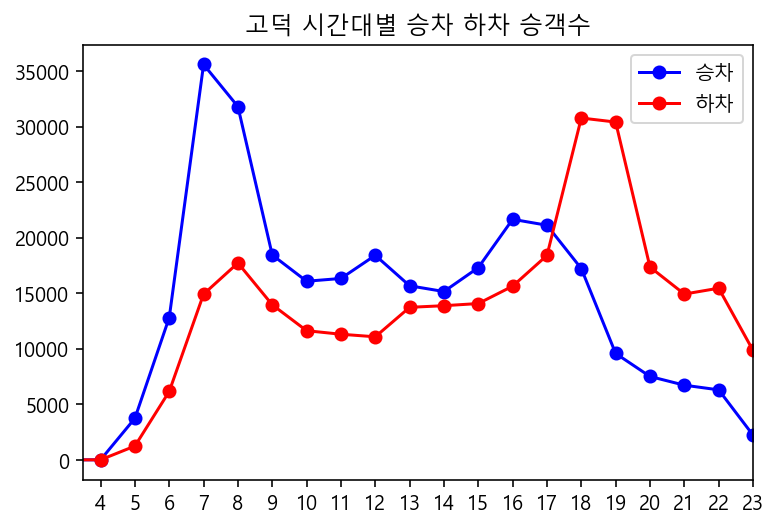

In [ ]:
plt.plot(승차_0['index'],승차_0['동작(현충원)'],color='blue',linestyle='-',marker='o')
plt.plot(하차_0['index'],하차_0['동작(현충원)'],color='red',linestyle='-',marker='o')
plt.title("동작(현충원) 시간대별 승차 하차 승객수")
plt.legend(["승차", "하차"])
plt.xlim([3.5, 23])

In [ ]:
plt.plot(승차_0['index'],승차_0['청량리(서울시립대입구)'],color='blue',linestyle='-',marker='o')
plt.plot(하차_0['index'],하차_0['청량리(서울시립대입구)'],color='red',linestyle='-',marker='o')  
plt.title("청량리(서울시립대입구) 시간대별 승차 하차 승객수")
plt.legend(["승차", "하차"])
plt.xlim([3.5, 23])

KeyError: '청량리(서울시립대입구)'

### 그룹2

In [424]:
a = SEOUL19_2.groupby(SEOUL19_2['STN_NM']).mean()
a = a.reset_index()

In [425]:
a = a.set_index("STN_NM")

In [426]:
a.columns

Index(['ID', 'STN_IDN', 'US_YY_DD', 'PS_00TM', 'AG_00TM', 'PS_01TM', 'AG_01TM',
       'PS_02TM', 'AG_02TM', 'PS_03TM', 'AG_03TM', 'PS_04TM', 'AG_04TM',
       'PS_05TM', 'AG_05TM', 'PS_06TM', 'AG_06TM', 'PS_07TM', 'AG_07TM',
       'PS_08TM', 'AG_08TM', 'PS_09TM', 'AG_09TM', 'PS_10TM', 'AG_10TM',
       'PS_11TM', 'AG_11TM', 'PS_12TM', 'AG_12TM', 'PS_13TM', 'AG_13TM',
       'PS_14TM', 'AG_14TM', 'PS_15TM', 'AG_15TM', 'PS_16TM', 'AG_16TM',
       'PS_17TM', 'AG_17TM', 'PS_18TM', 'AG_18TM', 'PS_19TM', 'AG_19TM',
       'PS_20TM', 'AG_20TM', 'PS_21TM', 'AG_21TM', 'PS_22TM', 'AG_22TM',
       'PS_23TM', 'AG_23TM', 'PA_NM', 'TM_X', 'TM_Y'],
      dtype='object')

In [317]:
승차 = a[['PS_00TM', 'PS_01TM', 'PS_02TM', 'PS_03TM', 'PS_04TM', 'PS_05TM', 'PS_06TM',  'PS_07TM', 
       'PS_08TM',  'PS_09TM', 'PS_10TM', 'PS_11TM', 'PS_12TM',  'PS_13TM', 'PS_14TM', 'PS_15TM',  'PS_16TM', 
       'PS_17TM',  'PS_18TM', 'PS_19TM',  'PS_20TM',  'PS_21TM',  'PS_22TM','PS_23TM']]
하차 = a[['AG_00TM', 'AG_01TM', 'AG_02TM', 'AG_03TM', 'AG_04TM', 'AG_05TM',  'AG_06TM',  'AG_07TM',
        'AG_08TM',  'AG_09TM',  'AG_10TM', 'AG_11TM', 'AG_12TM', 'AG_13TM', 'AG_14TM',  'AG_15TM',  'AG_16TM',
        'AG_17TM', 'AG_18TM',  'AG_19TM', 'AG_20TM', 'AG_21TM', 'AG_22TM', 'AG_23TM']]

In [318]:
승차 = 승차.rename(columns = {'PS_00TM':'0', 'PS_01TM':'1', 'PS_02TM':'2', 'PS_03TM':'3', 'PS_04TM':'4', 'PS_05TM':'5', 'PS_06TM':'6',  'PS_07TM':'7', 
       'PS_08TM':'8',  'PS_09TM':'9', 'PS_10TM':'10', 'PS_11TM':'11', 'PS_12TM':'12',  'PS_13TM':'13', 'PS_14TM':'14', 'PS_15TM':'15',  'PS_16TM':'16',  
       'PS_17TM':'17',  'PS_18TM':'18', 'PS_19TM':'19',  'PS_20TM':'20',  'PS_21TM':'21',  'PS_22TM':'22','PS_23TM':'23'})

In [319]:
하차 = 하차.rename(columns = {'AG_00TM':'0', 'AG_01TM':'1', 'AG_02TM':'2', 'AG_03TM':'3', 'AG_04TM':'4', 'AG_05TM':'5',  'AG_06TM':'6',  'AG_07TM':'7',
        'AG_08TM':'8',  'AG_09TM':'9',  'AG_10TM':'10', 'AG_11TM':'11', 'AG_12TM':'12', 'AG_13TM':'13', 'AG_14TM':'14',  'AG_15TM':'15',  'AG_16TM':'16',
        'AG_17TM':'17', 'AG_18TM':'18',  'AG_19TM':'19', 'AG_20TM':'20', 'AG_21TM':'21', 'AG_22TM':'22', 'AG_23TM':'23'})

In [320]:
승차_2 = 승차.T.reset_index()
하차_2 = 하차.T.reset_index()

(3.5, 23.0)

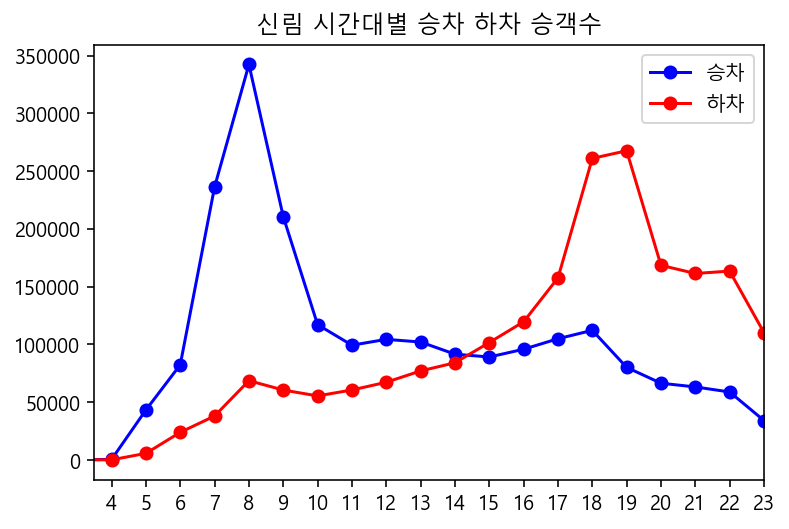

In [321]:
plt.plot(승차_2['index'],승차_2['신림'],color='blue',linestyle='-',marker='o')
plt.plot(하차_2['index'],하차_2['신림'],color='red',linestyle='-',marker='o')
plt.title("신림 시간대별 승차 하차 승객수")
plt.legend(["승차", "하차"])
plt.xlim([3.5, 23])

(3.5, 23.0)

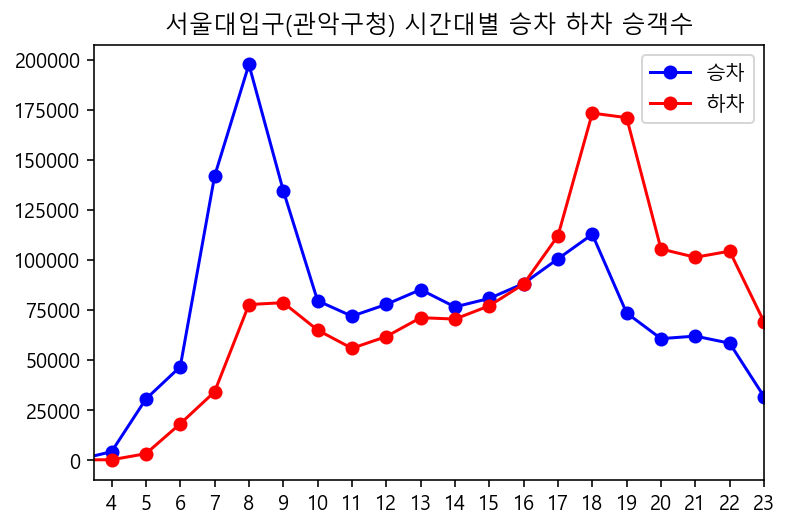

In [322]:
plt.plot(승차_2['index'],승차_2['서울대입구(관악구청)'],color='blue',linestyle='-',marker='o')
plt.plot(하차_2['index'],하차_2['서울대입구(관악구청)'],color='red',linestyle='-',marker='o')
plt.title("서울대입구(관악구청) 시간대별 승차 하차 승객수")
plt.legend(["승차", "하차"])
plt.xlim([3.5, 23])

### 그룹3

In [323]:
a = SEOUL19_3.groupby(SEOUL19_3['STN_NM']).mean()
a = a.reset_index()

In [324]:
a = a.set_index("STN_NM")

In [325]:
a.columns

Index(['ID', 'STN_IDN', 'US_YY_DD', 'PS_00TM', 'AG_00TM', 'PS_01TM', 'AG_01TM',
       'PS_02TM', 'AG_02TM', 'PS_03TM', 'AG_03TM', 'PS_04TM', 'AG_04TM',
       'PS_05TM', 'AG_05TM', 'PS_06TM', 'AG_06TM', 'PS_07TM', 'AG_07TM',
       'PS_08TM', 'AG_08TM', 'PS_09TM', 'AG_09TM', 'PS_10TM', 'AG_10TM',
       'PS_11TM', 'AG_11TM', 'PS_12TM', 'AG_12TM', 'PS_13TM', 'AG_13TM',
       'PS_14TM', 'AG_14TM', 'PS_15TM', 'AG_15TM', 'PS_16TM', 'AG_16TM',
       'PS_17TM', 'AG_17TM', 'PS_18TM', 'AG_18TM', 'PS_19TM', 'AG_19TM',
       'PS_20TM', 'AG_20TM', 'PS_21TM', 'AG_21TM', 'PS_22TM', 'AG_22TM',
       'PS_23TM', 'AG_23TM', 'PA_NM', 'TM_X', 'TM_Y'],
      dtype='object')

In [326]:
승차 = a[['PS_00TM', 'PS_01TM', 'PS_02TM', 'PS_03TM', 'PS_04TM', 'PS_05TM', 'PS_06TM',  'PS_07TM', 
       'PS_08TM',  'PS_09TM', 'PS_10TM', 'PS_11TM', 'PS_12TM',  'PS_13TM', 'PS_14TM', 'PS_15TM',  'PS_16TM', 
       'PS_17TM',  'PS_18TM', 'PS_19TM',  'PS_20TM',  'PS_21TM',  'PS_22TM','PS_23TM']]
하차 = a[['AG_00TM', 'AG_01TM', 'AG_02TM', 'AG_03TM', 'AG_04TM', 'AG_05TM',  'AG_06TM',  'AG_07TM',
        'AG_08TM',  'AG_09TM',  'AG_10TM', 'AG_11TM', 'AG_12TM', 'AG_13TM', 'AG_14TM',  'AG_15TM',  'AG_16TM',
        'AG_17TM', 'AG_18TM',  'AG_19TM', 'AG_20TM', 'AG_21TM', 'AG_22TM', 'AG_23TM']]

In [327]:
승차 = 승차.rename(columns = {'PS_00TM':'0', 'PS_01TM':'1', 'PS_02TM':'2', 'PS_03TM':'3', 'PS_04TM':'4', 'PS_05TM':'5', 'PS_06TM':'6',  'PS_07TM':'7', 
       'PS_08TM':'8',  'PS_09TM':'9', 'PS_10TM':'10', 'PS_11TM':'11', 'PS_12TM':'12',  'PS_13TM':'13', 'PS_14TM':'14', 'PS_15TM':'15',  'PS_16TM':'16',  
       'PS_17TM':'17',  'PS_18TM':'18', 'PS_19TM':'19',  'PS_20TM':'20',  'PS_21TM':'21',  'PS_22TM':'22','PS_23TM':'23'})

In [328]:
하차 = 하차.rename(columns = {'AG_00TM':'0', 'AG_01TM':'1', 'AG_02TM':'2', 'AG_03TM':'3', 'AG_04TM':'4', 'AG_05TM':'5',  'AG_06TM':'6',  'AG_07TM':'7',
        'AG_08TM':'8',  'AG_09TM':'9',  'AG_10TM':'10', 'AG_11TM':'11', 'AG_12TM':'12', 'AG_13TM':'13', 'AG_14TM':'14',  'AG_15TM':'15',  'AG_16TM':'16',
        'AG_17TM':'17', 'AG_18TM':'18',  'AG_19TM':'19', 'AG_20TM':'20', 'AG_21TM':'21', 'AG_22TM':'22', 'AG_23TM':'23'})

In [329]:
승차_3 = 승차.T.reset_index()
하차_3 = 하차.T.reset_index()

(3.5, 23.0)

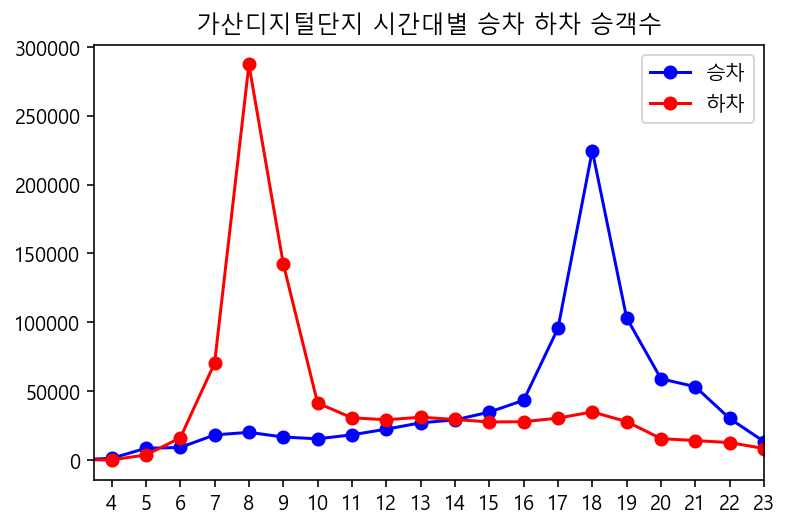

In [330]:
plt.plot(승차_3['index'],승차_3['가산디지털단지'],color='blue',linestyle='-',marker='o')
plt.plot(하차_3['index'],하차_3['가산디지털단지'],color='red',linestyle='-',marker='o')
plt.title("가산디지털단지 시간대별 승차 하차 승객수")
plt.legend(["승차", "하차"])
plt.xlim([3.5, 23])

(3.5, 23.0)

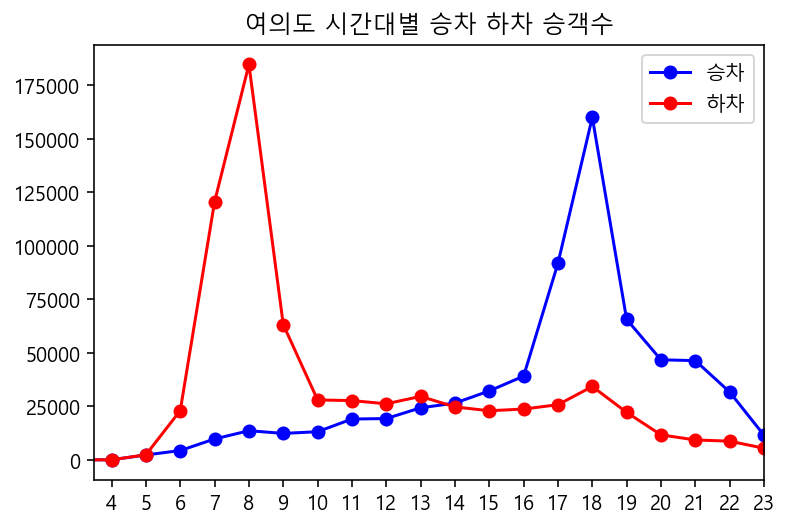

In [332]:
plt.plot(승차_3['index'],승차_3['여의도'],color='blue',linestyle='-',marker='o')
plt.plot(하차_3['index'],하차_3['여의도'],color='red',linestyle='-',marker='o')
plt.title("여의도 시간대별 승차 하차 승객수")
plt.legend(["승차", "하차"])
plt.xlim([3.5, 23])

### 량

In [226]:
량 = pd.DataFrame({'노선명':['2호선', '5호선', '6호선', '4호선', '3호선', '7호선', '9호선', '8호선', '1호선', '경원선', '경의선', '공항철도 1호선', '9호선2~3단계', '분당선', '우이신설선',
                         '경부선', '9호선2단계'],
                             '량':[10,8,8,10,10,8,6,6,10,10,8,6,6,6,2,10,6]})

In [227]:
상업환승 = 상업환승.merge(량)

In [228]:
상업환승['량'].value_counts()

10    25459
8     21261
6      9066
2       730
Name: 량, dtype: int64

# 다중공선성

In [229]:
상업환승.columns

Index(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '총승객수', 'TM_X', 'TM_Y', '노선수',
       '출입구', '학생수', '대학생수', 'year', 'month', 'day', 'week', 'date', '휴일여부',
       '평균기온', '최저기온', '최고기온', '일강수량', '최대풍속', '평균풍속', '승차총승객수_log', '총집객시설',
       '교육/보건', '산업', '숙박/음식', '행정', '레저/관광/예술', '영화관 개수', '백화점', '버스 정류장 개수',
       '량'],
      dtype='object')

<AxesSubplot:title={'center':'그룹0 상관관계'}>

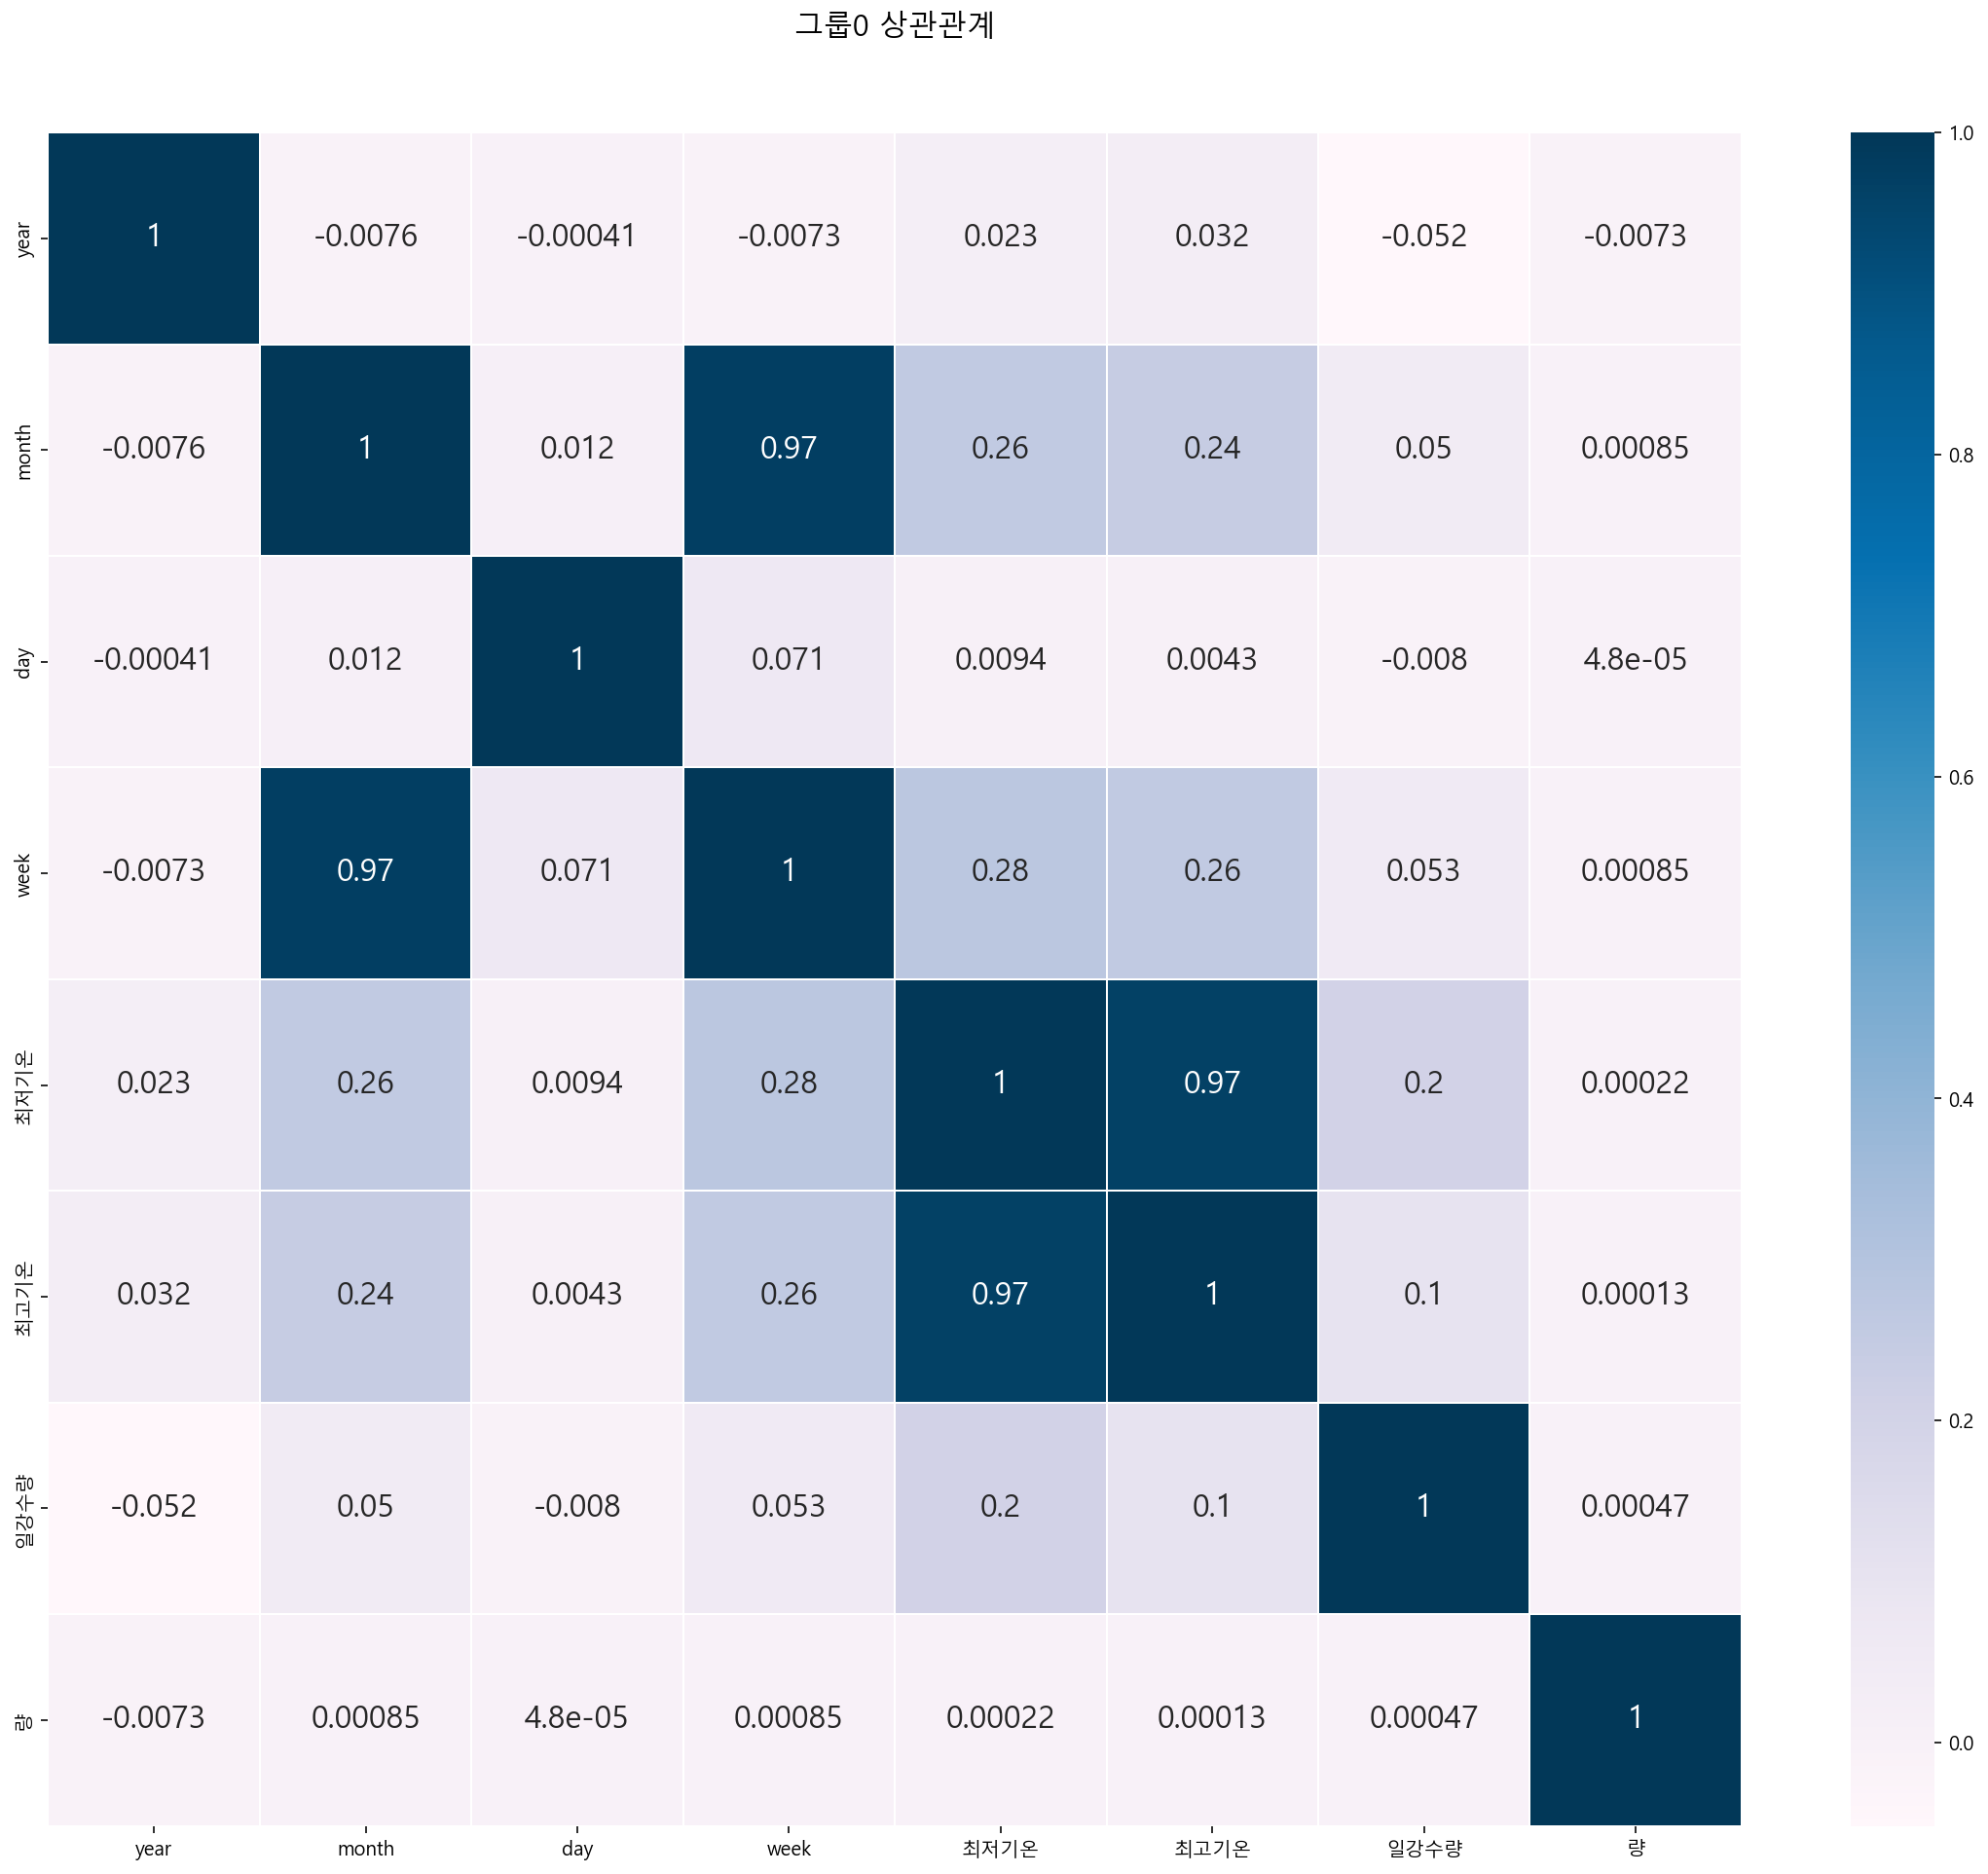

In [230]:
group_corr = 상업환승[['year', 'month', 'day', 'week', '최저기온', '최고기온', '일강수량','량']]
colormap = plt.cm.PuBu
plt.figure(figsize=(20, 16))
plt.title("그룹0 상관관계", y = 1.05, size = 15)
sns.heatmap(group_corr.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

<AxesSubplot:title={'center':'상업환승 변수 상관관계'}>

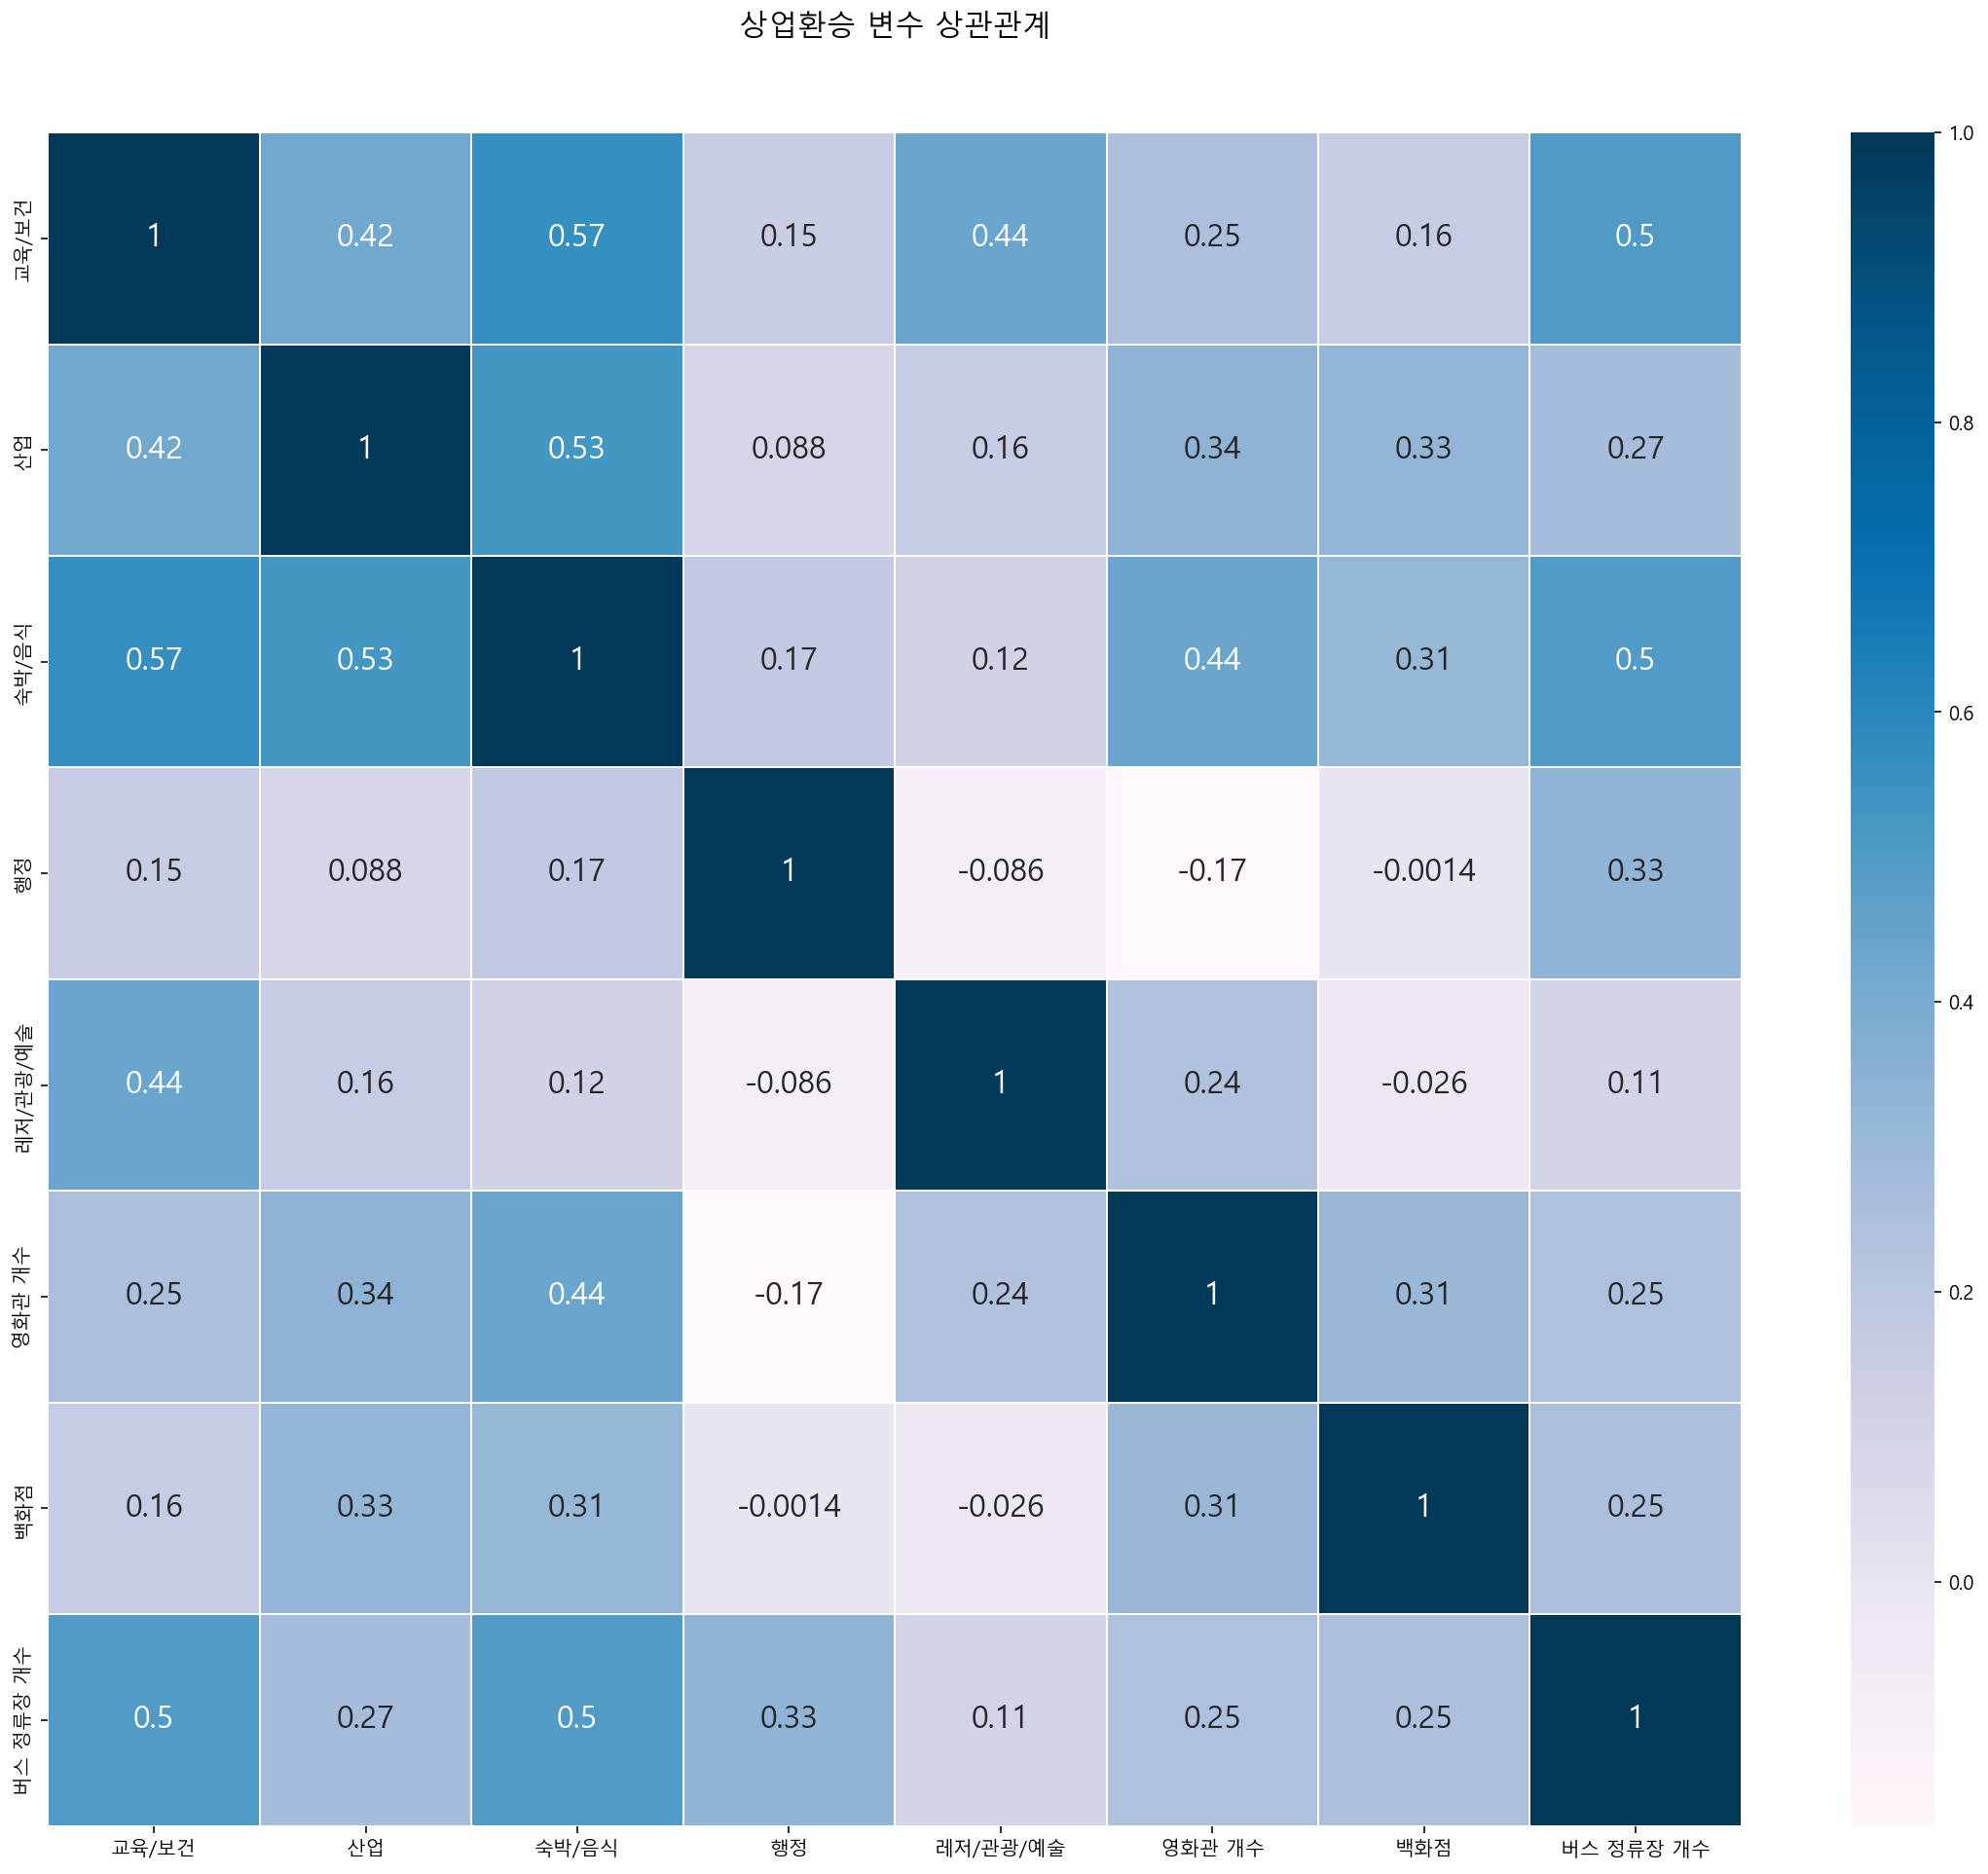

In [231]:
group_corr = 상업환승[['교육/보건', '산업', '숙박/음식', '행정', '레저/관광/예술', '영화관 개수', '백화점', '버스 정류장 개수']]
colormap = plt.cm.PuBu
plt.figure(figsize=(20, 16))
plt.title("상업환승 변수 상관관계", y = 1.05, size = 15)
sns.heatmap(group_corr.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

# 역별 요일별 승하차수

### 잠실

In [81]:
date = 상업환승[['역명','승차총승객수','date']]

In [82]:
역이름 = date[date['역명'] == '잠실(송파구청)']

In [83]:
역이름 = 역이름.groupby('date').sum()

In [84]:
역이름

,승차총승객수
date,
Friday,12062248.0
Monday,10787287.0
Saturday,11144512.0
Sunday,8217681.0
Thursday,11218578.0
Tuesday,11170880.0
Wednesday,11089269.0


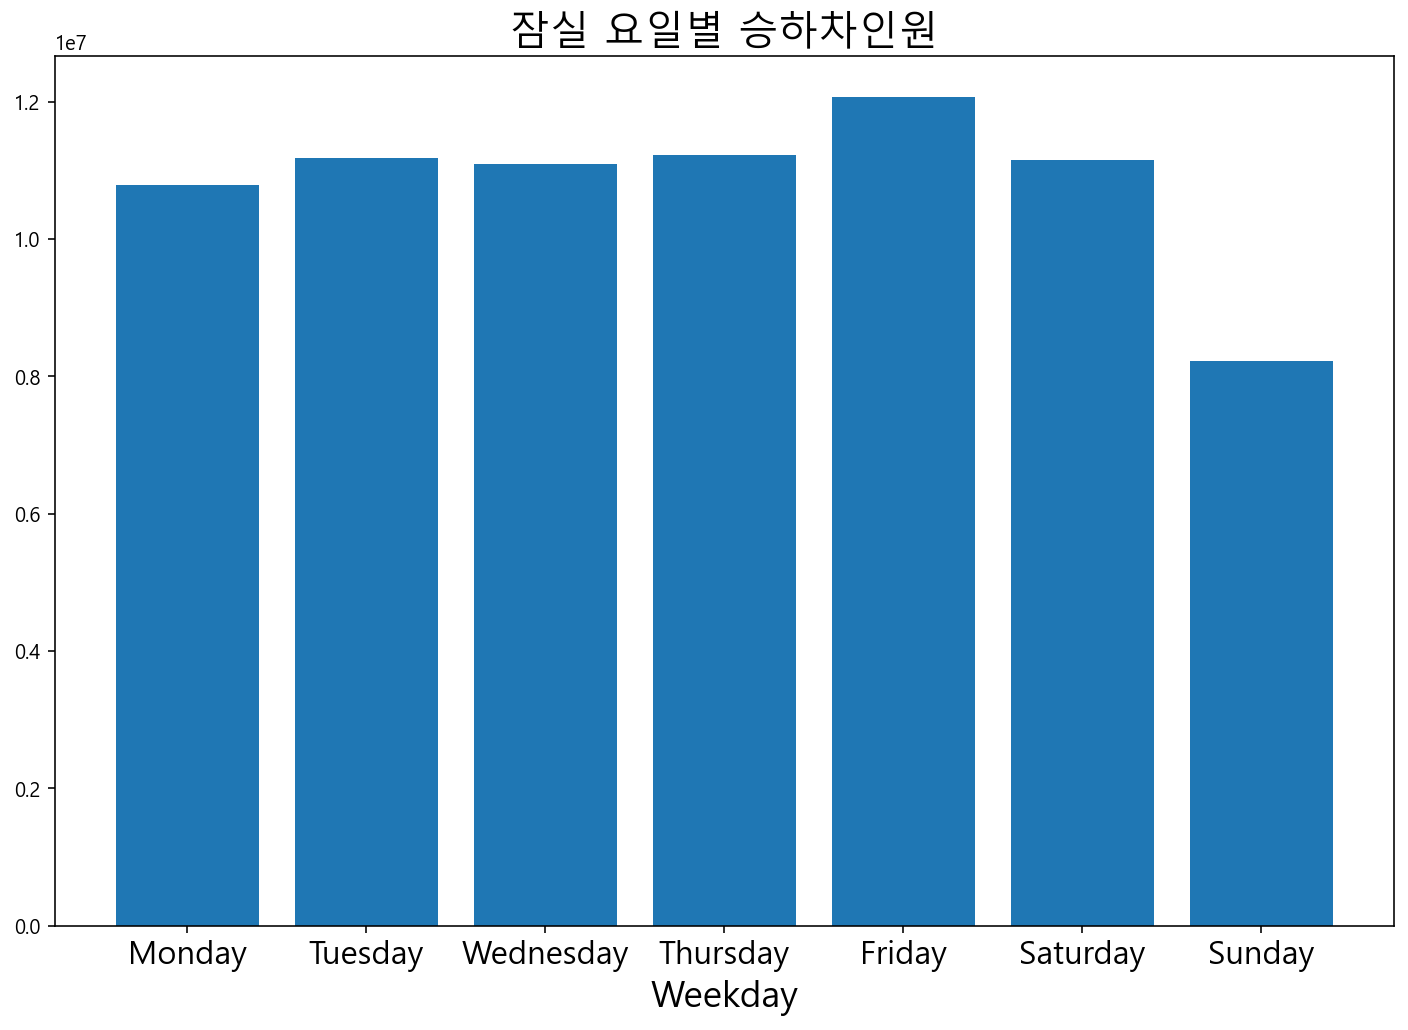

In [85]:
date = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
역이름 = 역이름.loc[date]

plt.figure(figsize=(12, 8))
plt.bar(역이름.index, 역이름.승차총승객수)
plt.title("잠실 요일별 승하차인원", fontsize=20)
plt.xlabel("Weekday", fontsize=18)
plt.xticks(fontsize=16)
plt.show()

### 강변

In [86]:
date = 상업환승[['역명','승차총승객수','date']]

In [87]:
역이름 = date[date['역명'] == '강변(동서울터미널)']

In [88]:
역이름 = 역이름.groupby('date').sum()

In [89]:
역이름

,승차총승객수
date,
Friday,5524427.0
Monday,4787183.0
Saturday,5198016.0
Sunday,3973420.0
Thursday,4749917.0
Tuesday,4629313.0
Wednesday,4634932.0


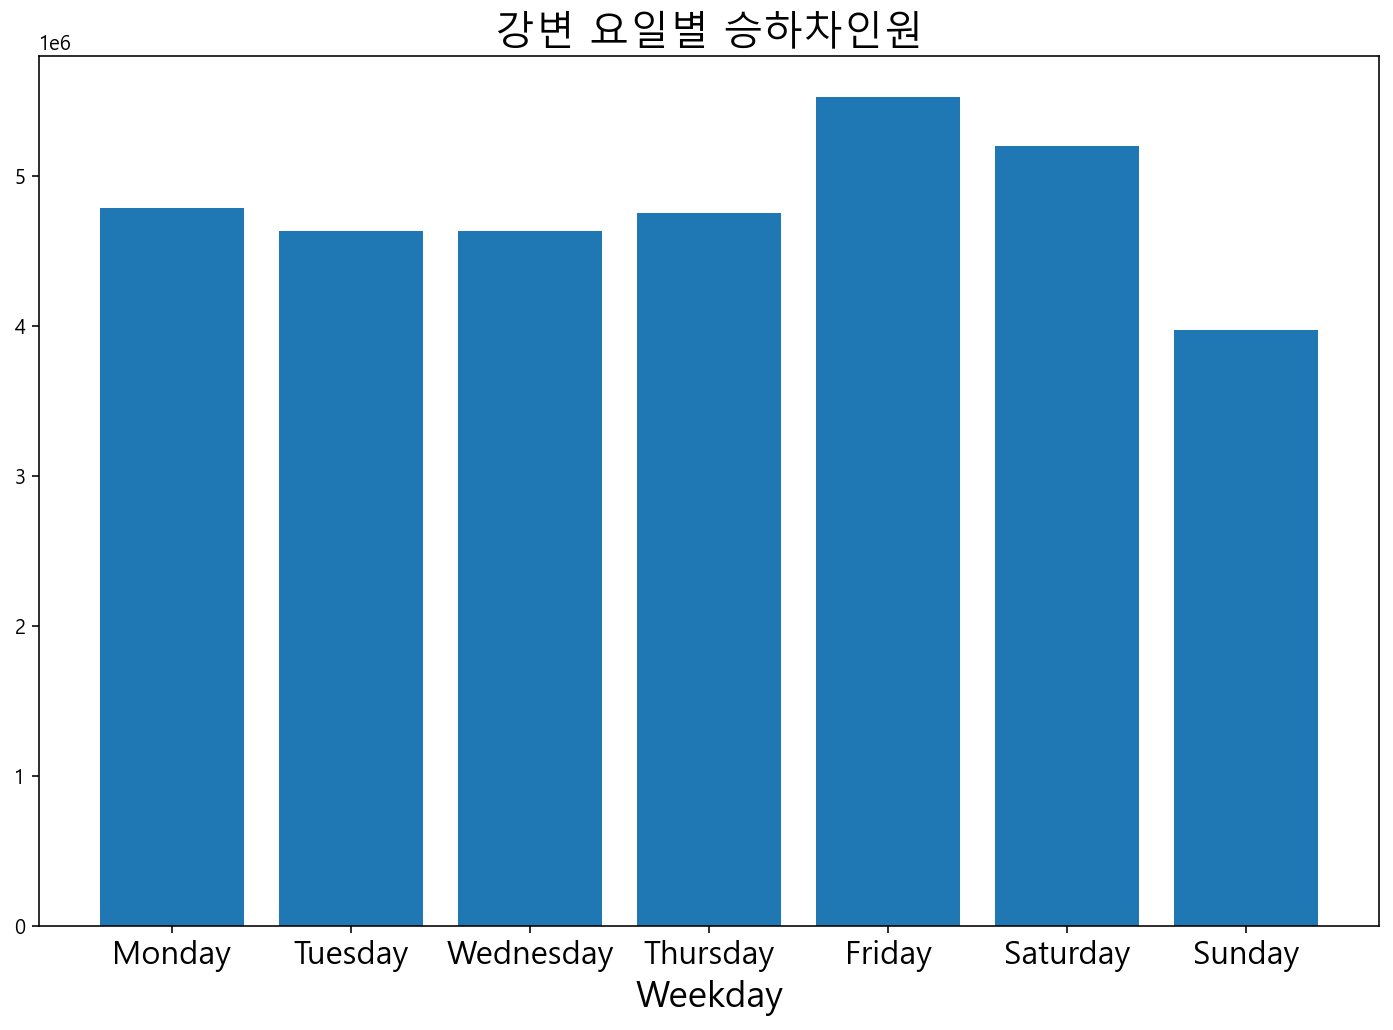

In [91]:
date = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
역이름 = 역이름.loc[date]

plt.figure(figsize=(12, 8))
plt.bar(역이름.index, 역이름.승차총승객수)
plt.title("강변 요일별 승하차인원", fontsize=20)
plt.xlabel("Weekday", fontsize=18)
plt.xticks(fontsize=16)
plt.show()

### 혜화

In [92]:
date = 상업환승[['역명','승차총승객수','date']]

In [93]:
역이름 = date[date['역명'] == '혜화']

In [94]:
역이름 = 잠실.groupby('date').sum()

In [95]:
역이름

,승차총승객수
date,
Friday,12062248.0
Monday,10787287.0
Saturday,11144512.0
Sunday,8217681.0
Thursday,11218578.0
Tuesday,11170880.0
Wednesday,11089269.0


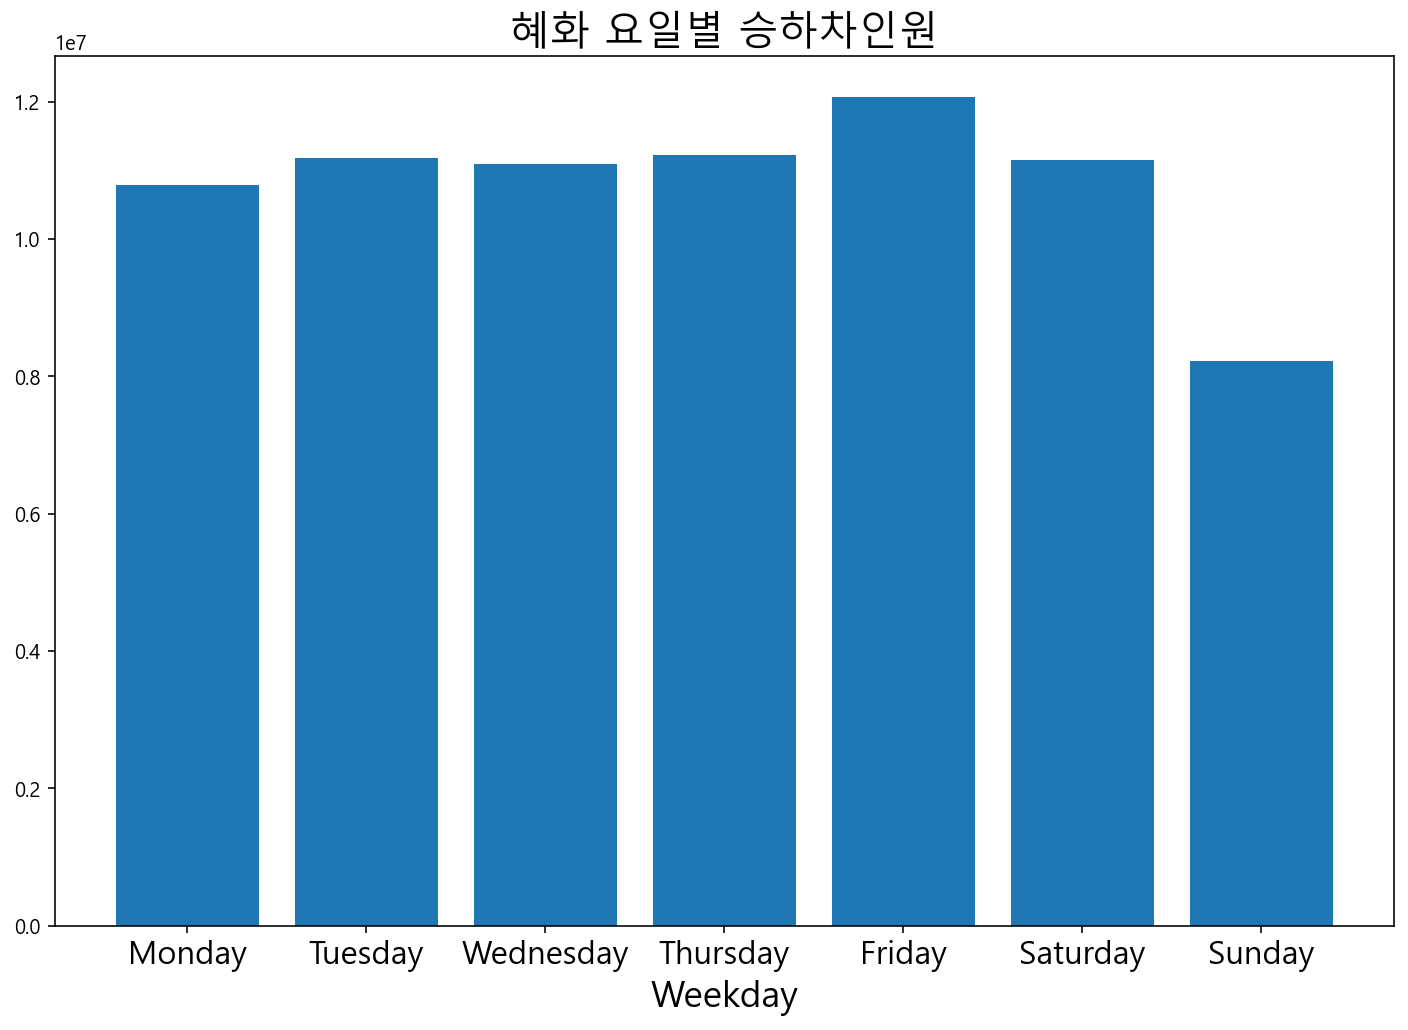

In [97]:
date = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
역이름 = 역이름.loc[date]

plt.figure(figsize=(12, 8))
plt.bar(역이름.index, 역이름.승차총승객수)
plt.title("혜화 요일별 승하차인원", fontsize=20)
plt.xlabel("Weekday", fontsize=18)
plt.xticks(fontsize=16)
plt.show()

### 사당

In [104]:
date = 상업환승[['역명','승차총승객수','date']]

In [105]:
역이름 = date[date['역명'] == '사당']

In [106]:
역이름 = 역이름.groupby('date').sum()

In [107]:
역이름

,승차총승객수
date,
Friday,8594462.0
Monday,7643931.0
Saturday,7106028.0
Sunday,5021029.0
Thursday,8040208.0
Tuesday,7959428.0
Wednesday,7900463.0


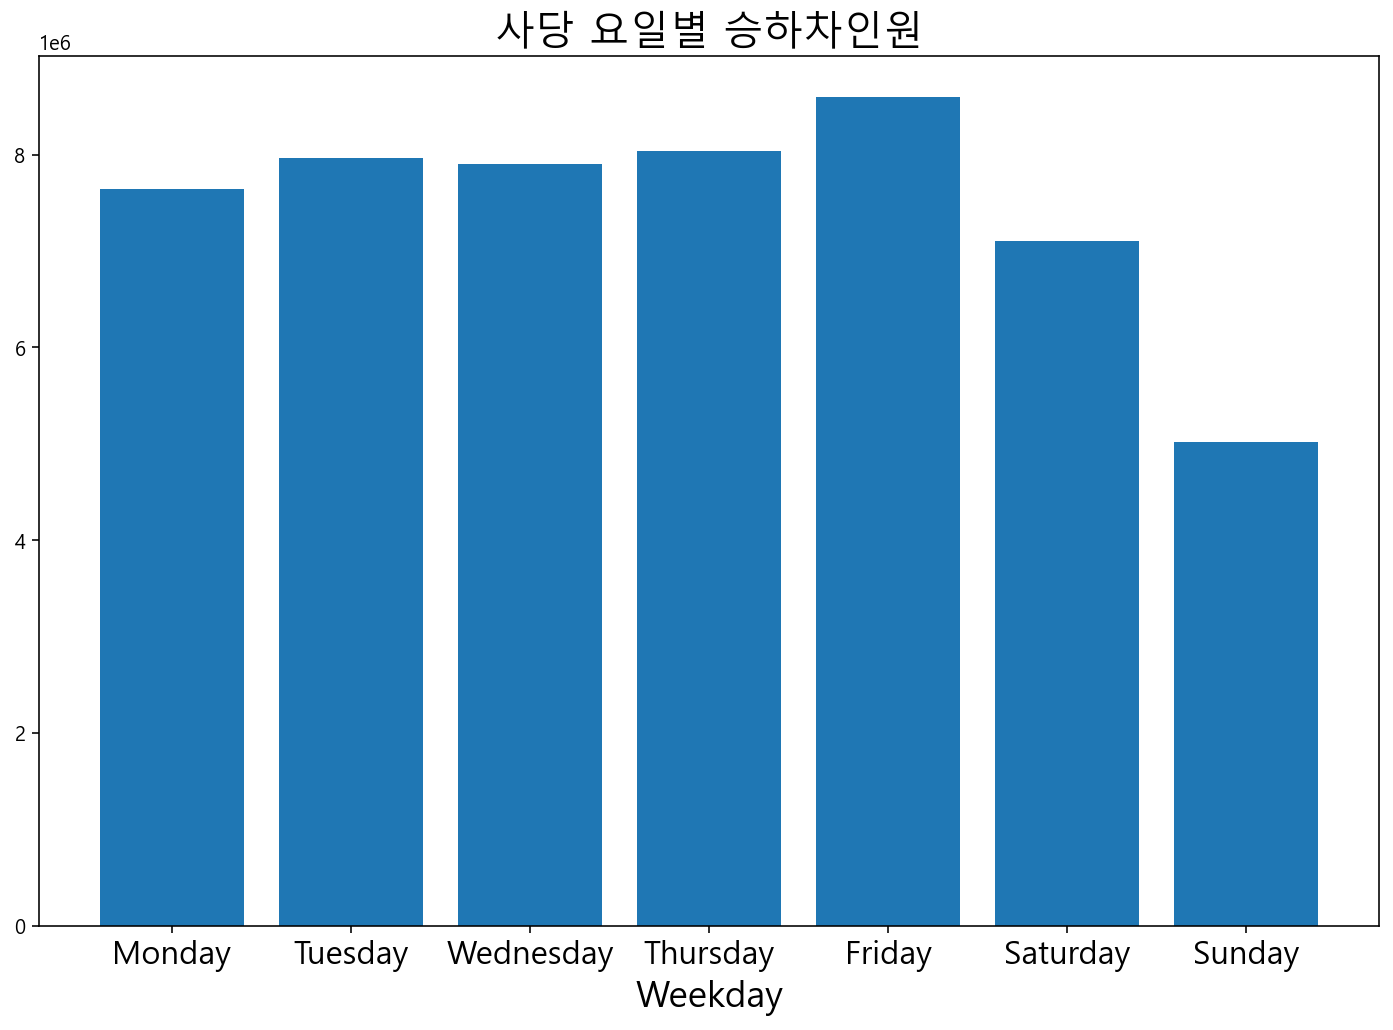

In [108]:
date = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
역이름 = 역이름.loc[date]

plt.figure(figsize=(12, 8))
plt.bar(역이름.index, 역이름.승차총승객수)
plt.title("사당 요일별 승하차인원", fontsize=20)
plt.xlabel("Weekday", fontsize=18)
plt.xticks(fontsize=16)
plt.show()

### 동작(현충원) - 제일 적음

In [140]:
date = 상업환승[['역명','승차총승객수','date']]

In [141]:
역이름 = date[date['역명'] == '동작(현충원)']

In [142]:
역이름 = 역이름.groupby('date').sum()

In [143]:
역이름

,승차총승객수
date,
Friday,560963.0
Monday,507220.0
Saturday,453745.0
Sunday,329250.0
Thursday,548884.0
Tuesday,525867.0
Wednesday,545018.0


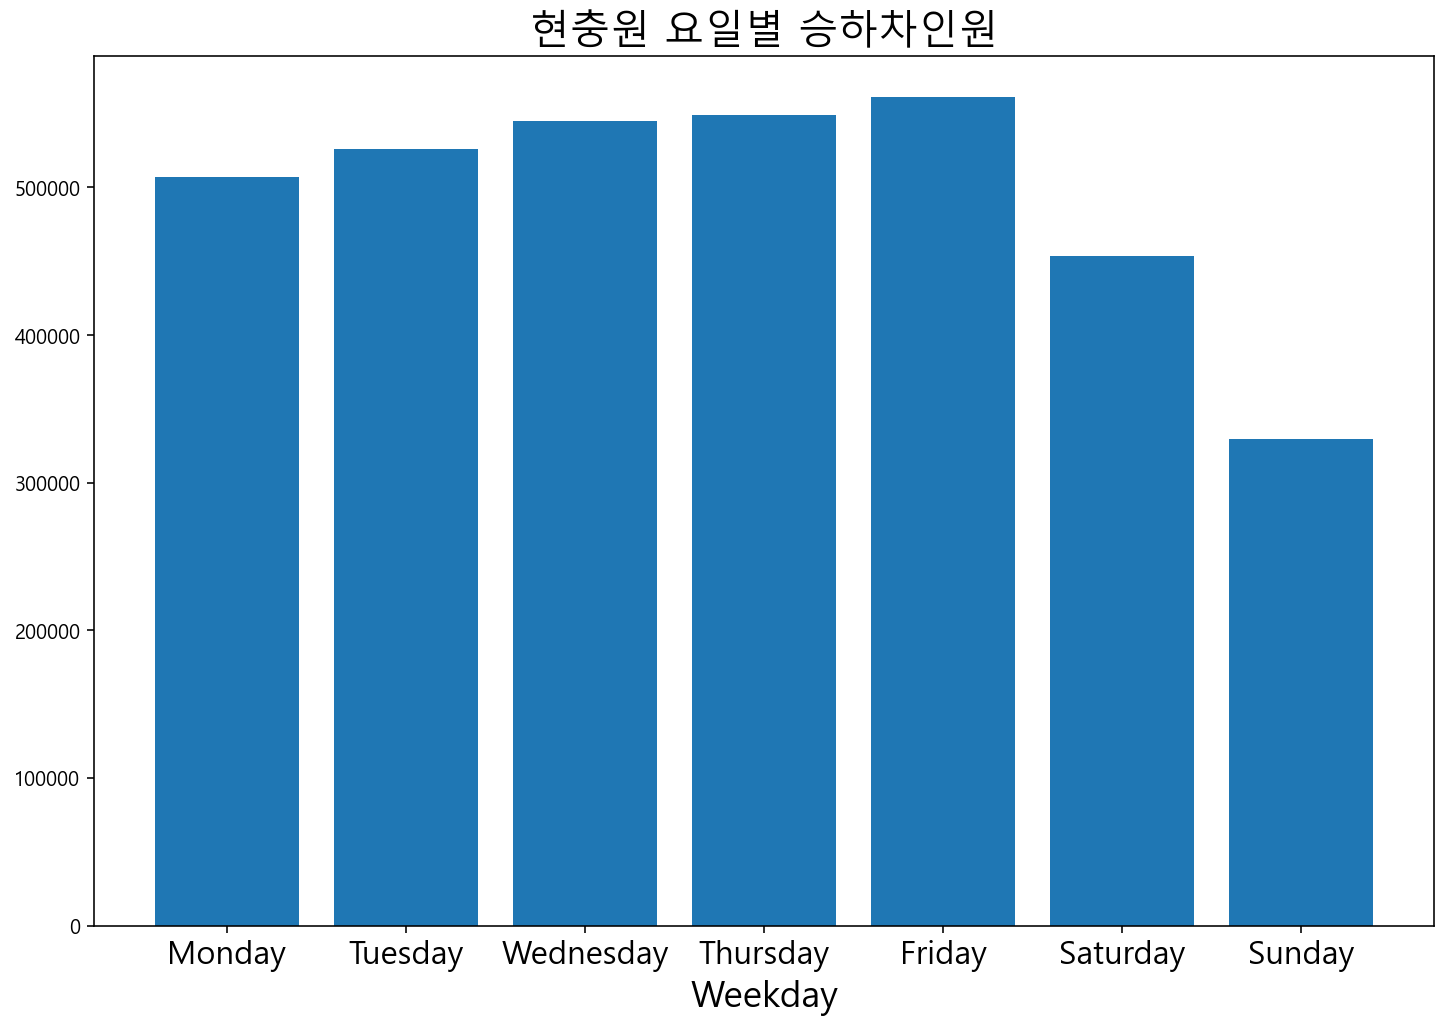

In [133]:
date = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
역이름 = 역이름.loc[date]

plt.figure(figsize=(12, 8))
plt.bar(역이름.index, 역이름.승차총승객수)
plt.title("현충원 요일별 승하차인원", fontsize=20)
plt.xlabel("Weekday", fontsize=18)
plt.xticks(fontsize=16)
plt.show()

### 전체

In [156]:
date = 상업환승[['역명','승차총승객수','date']]

In [157]:
역이름 = date.groupby('date').sum()

In [158]:
역이름

,승차총승객수
date,
Friday,162256774.0
Monday,146837834.0
Saturday,144242081.0
Sunday,106419295.0
Thursday,150985767.0
Tuesday,150342597.0
Wednesday,149822113.0


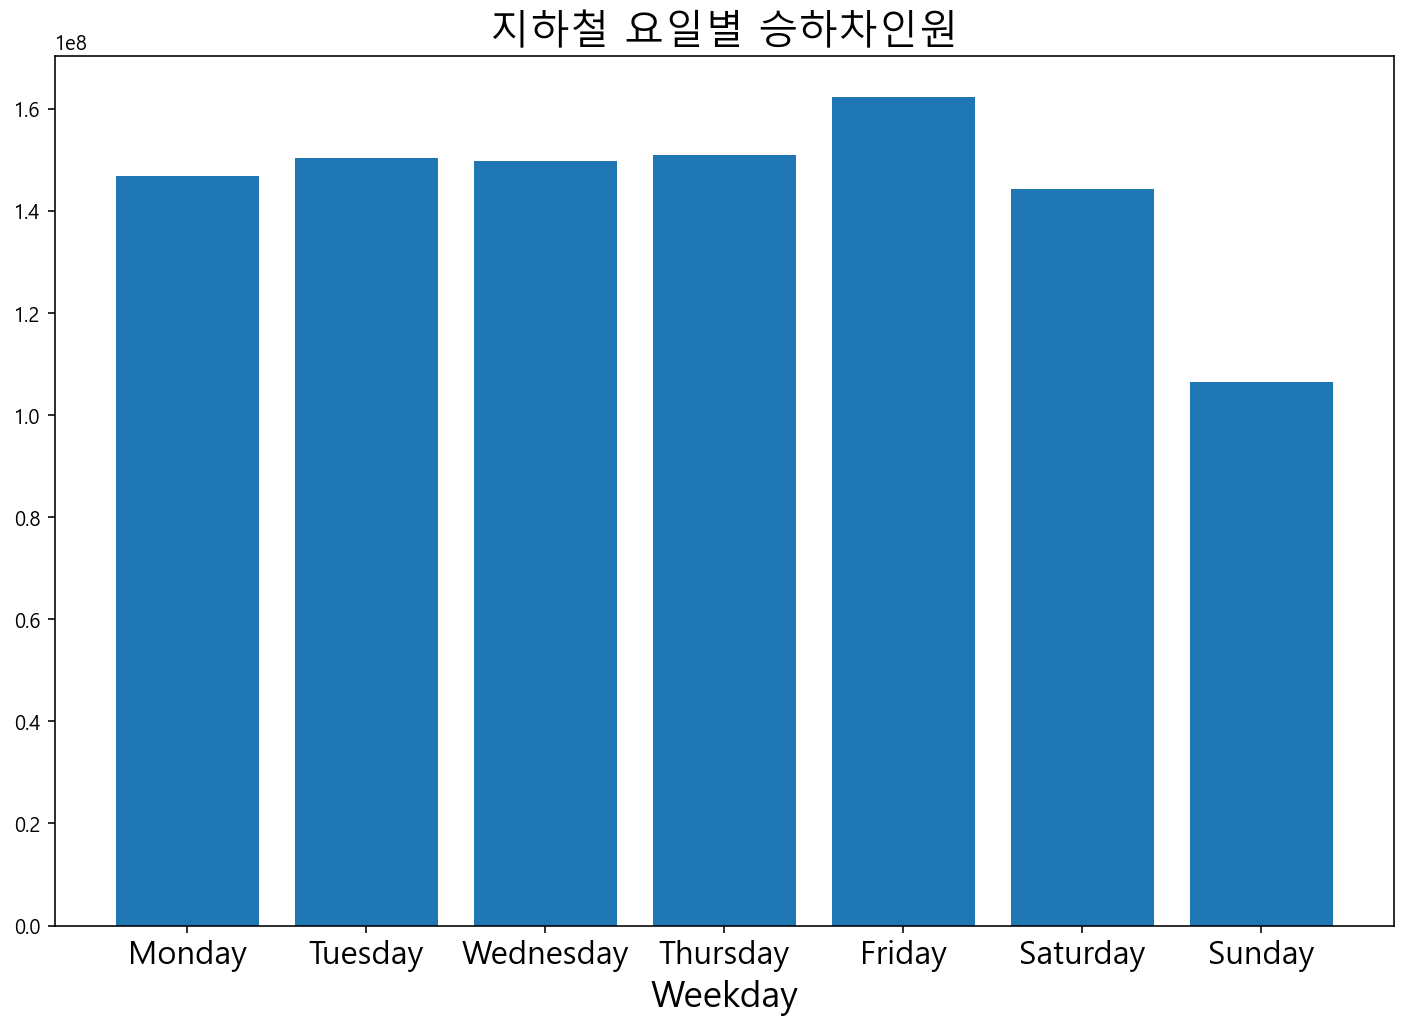

In [159]:
date = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
역이름 = 역이름.loc[date]

plt.figure(figsize=(12, 8))
plt.bar(역이름.index, 역이름.승차총승객수)
plt.title("지하철 요일별 승하차인원", fontsize=20)
plt.xlabel("Weekday", fontsize=18)
plt.xticks(fontsize=16)
plt.show()

# 누적휴일

In [199]:
상업환승['사용일자'] = pd.to_datetime(상업환승['사용일자']).dt.normalize()
date_table = 상업환승.pivot_table(index = ['사용일자', '휴일여부', 'date'], values='총승객수', aggfunc='sum')
date_table = date_table.reset_index()
#누적 휴일 변수 만들어주기
holiday_count = [0] * date_table.shape[0]
holiday = date_table['휴일여부']

n = 1

for i in range(date_table.shape[0]):
    if holiday[i] == 'Y':
        holiday_count[i] = n
        n += 1
    else:
        n = 1
        
date_table['누적휴일'] = holiday_count
#위에서 만든 누적휴일, 환승노선을 컬럼으로 넣어주기

상업환승 = 상업환승.merge(date_table, on = ['사용일자', '휴일여부', 'date'], how = 'left')

In [200]:
상업환승

,사용일자,노선명,역명,승차총승객수,하차총승객수,총승객수_x,TM_X,TM_Y,노선수,출입구,...,숙박/음식,행정,레저/관광/예술,영화관 개수,백화점,버스 정류장 개수,교육/보건_이상치,1일우량,총승객수_y,누적휴일
0,2018-01-01,2호선,강변(동서울터미널),37348.0,33026.0,70374.0,208367.2887,548408.9657,1.0,4.0,...,0,1,2,2,0,12,False,비 안옴,1557709.0,1
1,2018-01-02,2호선,강변(동서울터미널),47562.0,45693.0,93255.0,208367.2887,548408.9657,1.0,4.0,...,0,1,2,2,0,12,False,비 안옴,2761114.0,0
2,2018-01-03,2호선,강변(동서울터미널),45040.0,44074.0,89114.0,208367.2887,548408.9657,1.0,4.0,...,0,1,2,2,0,12,False,비 안옴,2829582.0,0
3,2018-01-04,2호선,강변(동서울터미널),45680.0,44419.0,90099.0,208367.2887,548408.9657,1.0,4.0,...,0,1,2,2,0,12,False,비 안옴,2859772.0,0
4,2018-01-05,2호선,강변(동서울터미널),51823.0,50127.0,101950.0,208367.2887,548408.9657,1.0,4.0,...,0,1,2,2,0,12,False,비 안옴,3079357.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56511,2019-10-01,경의선,홍대입구,2165.0,2494.0,4659.0,193407.6064,550859.6077,3.0,9.0,...,15,0,7,2,0,30,False,비 안옴,3008034.0,0
56512,2019-10-01,공항철도 1호선,홍대입구,12261.0,12015.0,24276.0,193407.6064,550859.6077,3.0,9.0,...,15,0,7,2,0,30,False,비 안옴,3008034.0,0
56513,2019-10-01,2호선,홍대입구,74428.0,78451.0,152879.0,193407.6064,550859.6077,3.0,9.0,...,15,0,7,2,0,30,False,비 안옴,3008034.0,0
56514,2019-10-02,경의선,홍대입구,2154.0,2790.0,4944.0,193407.6064,550859.6077,3.0,9.0,...,15,0,7,2,0,30,False,보통 비,2934673.0,0


주말은 어차피 항상 1,2
-> 주말 평일 나누지 말고 전제로 봐야함
-> 평일에서 누적휴일 한번 봐주자, 주말은 어차피 맨날 쉬니까!

혹은 주말은 어차피 항상 1,2 니까 1,2 / 3,4,5 -> 확인?

### 전체

In [202]:
누적휴일_0 = 상업환승[상업환승['누적휴일'] == 0]
누적휴일_1 = 상업환승[상업환승['누적휴일'] == 1]
누적휴일_2 = 상업환승[상업환승['누적휴일'] == 2]
누적휴일_3 = 상업환승[상업환승['누적휴일'] == 3]
누적휴일_4 = 상업환승[상업환승['누적휴일'] == 4]
누적휴일_5 = 상업환승[상업환승['누적휴일'] == 5]

In [203]:
누적휴일_0g = 누적휴일_0.groupby('역명').mean().reset_index()
누적휴일_1g = 누적휴일_1.groupby('역명').mean().reset_index()
누적휴일_2g = 누적휴일_2.groupby('역명').mean().reset_index()
누적휴일_3g = 누적휴일_3.groupby('역명').mean().reset_index()
누적휴일_4g = 누적휴일_4.groupby('역명').mean().reset_index()
누적휴일_5g = 누적휴일_5.groupby('역명').mean().reset_index()

In [204]:
누적휴일_0g = 누적휴일_0g[['역명', '총승객수_x']].sort_values('총승객수_x', ascending= False)
누적휴일_0g = 누적휴일_0g.rename(columns = {'총승객수_x':'누적휴일_0'})

In [205]:
누적휴일_1g = 누적휴일_1g[['역명', '총승객수_x']].sort_values('총승객수_x', ascending= False)
누적휴일_1g = 누적휴일_1g.rename(columns = {'총승객수_x':'누적휴일_1'})

In [206]:
누적휴일_2g = 누적휴일_2g[['역명', '총승객수_x']].sort_values('총승객수_x', ascending= False)
누적휴일_2g = 누적휴일_2g.rename(columns = {'총승객수_x':'누적휴일_2'})

In [207]:
누적휴일_3g = 누적휴일_3g[['역명', '총승객수_x']].sort_values('총승객수_x', ascending= False)
누적휴일_3g = 누적휴일_3g.rename(columns = {'총승객수_x':'누적휴일_3'})

In [208]:
누적휴일_4g = 누적휴일_4g[['역명', '총승객수_x']].sort_values('총승객수_x', ascending= False)
누적휴일_4g = 누적휴일_4g.rename(columns = {'총승객수_x':'누적휴일_4'})

In [209]:
누적휴일_5g = 누적휴일_5g[['역명', '총승객수_x']].sort_values('총승객수_x', ascending= False)
누적휴일_5g = 누적휴일_5g.rename(columns = {'총승객수_x':'누적휴일_5'})

In [210]:
merge_df = pd.merge(누적휴일_0g, 누적휴일_1g, on="역명")
merge_df = pd.merge(merge_df,누적휴일_2g, on="역명")
merge_df = pd.merge(merge_df,누적휴일_3g, on="역명")
merge_df = pd.merge(merge_df,누적휴일_4g, on="역명")
merge_df = pd.merge(merge_df,누적휴일_5g, on="역명")

In [211]:
merge_df5 = merge_df.set_index('역명')

In [212]:
merge_df5

,누적휴일_0,누적휴일_1,누적휴일_2,누적휴일_3,누적휴일_4,누적휴일_5
역명,,,,,,
잠실(송파구청),109196.007085,102935.429752,76815.096154,70343.214286,60634.666667,65360.500000
강변(동서울터미널),93017.718623,96364.859504,78357.836538,75195.000000,70383.666667,70057.000000
혜화,89166.163968,88001.181818,66614.259615,52575.428571,47040.000000,46712.000000
사당,79980.531377,67575.971074,48756.889423,38250.357143,34259.333333,34779.000000
신도림,68479.050607,60665.603306,43415.807692,34701.000000,31262.500000,30677.500000
건대입구,66407.705466,65724.566116,49017.649038,44939.428571,38860.833333,40636.000000
고속터미널,63473.476383,75986.661157,61150.798077,58811.809524,56161.777778,59998.666667
홍대입구,62405.493119,75495.107595,56943.156934,52461.714286,47263.777778,49380.666667
오목교(목동운동장앞),57198.431174,42788.289256,30393.875000,25273.571429,22605.000000,21797.000000


Text(0.5, 1.0, '누적휴일에 따른 총승객수')

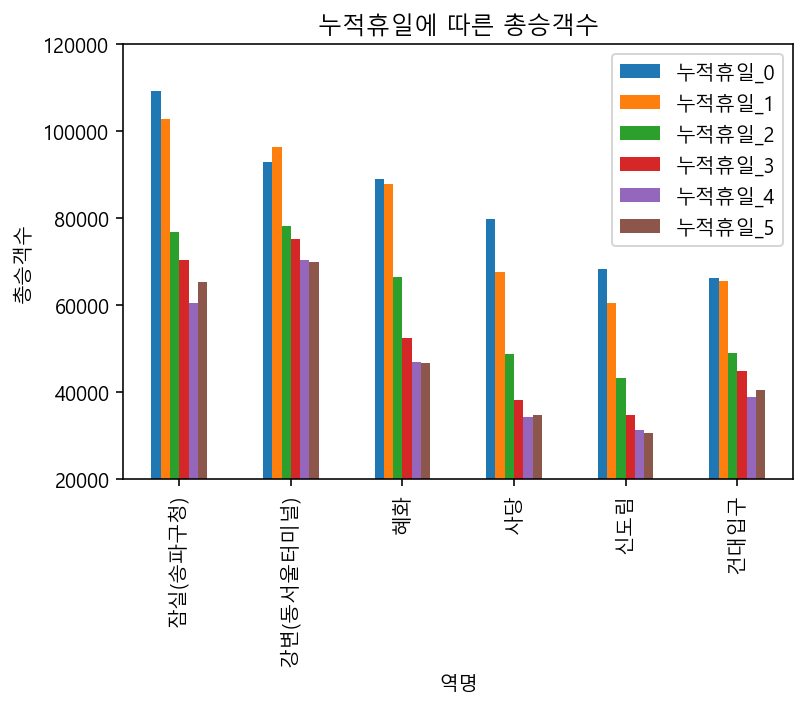

In [213]:
merge_df5.plot.bar()
plt.xlim([-0.5, 5.5])
plt.ylim([20000, 120000])
plt.ylabel('총승객수')
plt.title('누적휴일에 따른 총승객수')

## 주말을 제외한 누적휴일상업환승

In [60]:
상업환승.date.value_counts()

Tuesday      8132
Monday       8130
Friday       8052
Wednesday    8051
Thursday     8051
Sunday       8051
Saturday     8049
Name: date, dtype: int64

In [61]:
상업환승_day = 상업환승[(상업환승['date'] == 'Tuesday') | (상업환승['date'] == 'Monday')|(상업환승['date'] == 'Friday') | (상업환승['date'] == 'Wednesday')|(상업환승['date'] == 'Thursday')]

In [62]:
상업환승_week = 상업환승[(상업환승['date'] == 'Saturday') | (상업환승['date'] == 'Sunday')]

In [63]:
상업환승.누적휴일.value_counts()

0    38250
1     9359
2     8049
3      546
4      234
5       78
Name: 누적휴일, dtype: int64

In [64]:
상업환승_day.누적휴일.value_counts()

0    38250
1     1544
3      311
2      155
4       78
5       78
Name: 누적휴일, dtype: int64

In [65]:
상업환승_week.누적휴일.value_counts()

2    7894
1    7815
3     235
4     156
Name: 누적휴일, dtype: int64

In [66]:
누적휴일_0 = 상업환승_day[상업환승_day['누적휴일'] == 0]
누적휴일_1 = 상업환승_day[상업환승_day['누적휴일'] == 1]
누적휴일_2 = 상업환승_day[상업환승_day['누적휴일'] == 2]
누적휴일_3 = 상업환승_day[상업환승_day['누적휴일'] == 3]
누적휴일_4 = 상업환승_day[상업환승_day['누적휴일'] == 4]
누적휴일_5 = 상업환승_day[상업환승_day['누적휴일'] == 5]

In [67]:
누적휴일_0g = 누적휴일_0.groupby('역명').mean().reset_index()
누적휴일_1g = 누적휴일_1.groupby('역명').mean().reset_index()
누적휴일_2g = 누적휴일_2.groupby('역명').mean().reset_index()
누적휴일_3g = 누적휴일_3.groupby('역명').mean().reset_index()
누적휴일_4g = 누적휴일_4.groupby('역명').mean().reset_index()
누적휴일_5g = 누적휴일_5.groupby('역명').mean().reset_index()

In [68]:
누적휴일_0g = 누적휴일_0g[['역명', '총승객수_x']].sort_values('총승객수_x', ascending= False)
누적휴일_0g = 누적휴일_0g.rename(columns = {'총승객수_x':'누적휴일_0'})

In [69]:
누적휴일_1g = 누적휴일_1g[['역명', '총승객수_x']].sort_values('총승객수_x', ascending= False)
누적휴일_1g = 누적휴일_1g.rename(columns = {'총승객수_x':'누적휴일_1'})

In [70]:
누적휴일_2g = 누적휴일_2g[['역명', '총승객수_x']].sort_values('총승객수_x', ascending= False)
누적휴일_2g = 누적휴일_2g.rename(columns = {'총승객수_x':'누적휴일_2'})

In [71]:
누적휴일_3g = 누적휴일_3g[['역명', '총승객수_x']].sort_values('총승객수_x', ascending= False)
누적휴일_3g = 누적휴일_3g.rename(columns = {'총승객수_x':'누적휴일_3'})

In [72]:
누적휴일_4g = 누적휴일_4g[['역명', '총승객수_x']].sort_values('총승객수_x', ascending= False)
누적휴일_4g = 누적휴일_4g.rename(columns = {'총승객수_x':'누적휴일_4'})

In [73]:
누적휴일_5g = 누적휴일_5g[['역명', '총승객수_x']].sort_values('총승객수_x', ascending= False)
누적휴일_5g = 누적휴일_5g.rename(columns = {'총승객수_x':'누적휴일_5'})

In [74]:
merge_df = pd.merge(누적휴일_0g, 누적휴일_1g, on="역명")
merge_df = pd.merge(merge_df,누적휴일_2g, on="역명")
merge_df = pd.merge(merge_df,누적휴일_3g, on="역명")
merge_df = pd.merge(merge_df,누적휴일_4g, on="역명")
merge_df = pd.merge(merge_df,누적휴일_5g, on="역명")

In [75]:
merge_df5 = merge_df.set_index('역명')

In [76]:
merge_df5

,누적휴일_0,누적휴일_1,누적휴일_2,누적휴일_3,누적휴일_4,누적휴일_5
역명,,,,,,
잠실(송파구청),109196.007085,85417.675000,50273.000000,68176.875000,44939.500000,65360.500000
강변(동서울터미널),93017.718623,73726.250000,56703.000000,76496.750000,54652.000000,70057.000000
혜화,89166.163968,72017.250000,33250.500000,49248.500000,27559.000000,46712.000000
사당,79980.531377,50110.100000,23760.250000,36839.750000,22531.000000,34779.000000
신도림,68479.050607,44609.275000,21637.500000,33281.500000,20112.500000,30677.500000
건대입구,66407.705466,52590.150000,27099.500000,44021.000000,24490.000000,40636.000000
고속터미널,63473.476383,56601.766667,36349.666667,59023.750000,38452.333333,59998.666667
홍대입구,62405.493119,58889.627451,34195.000000,49537.333333,29328.333333,49380.666667
오목교(목동운동장앞),57198.431174,34658.500000,13741.500000,25675.500000,13061.000000,21797.000000


Text(0.5, 1.0, '평일 누적휴일에 따른 총승객수')

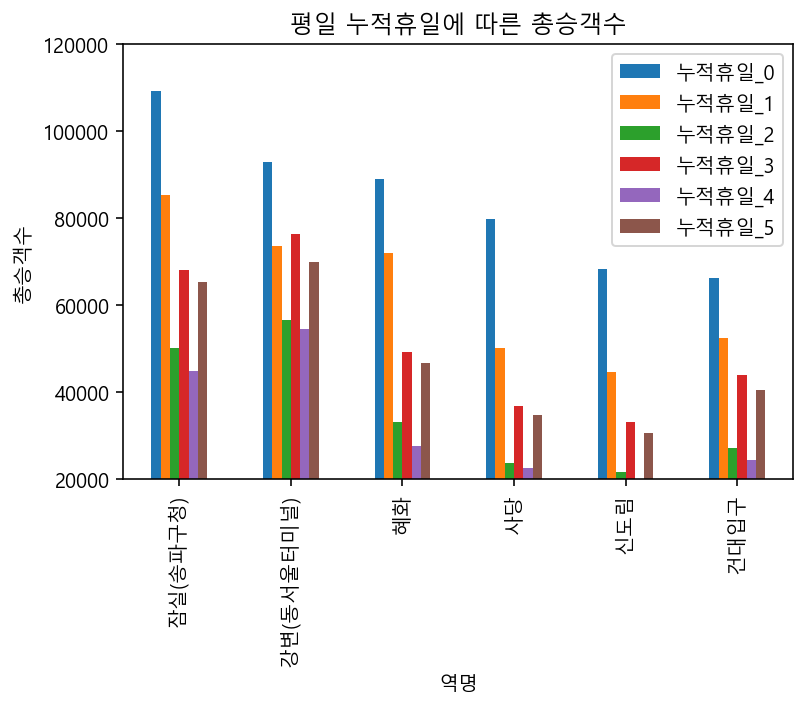

In [77]:
merge_df5.plot.bar()
plt.xlim([-0.5, 5.5])
plt.ylim([20000, 120000])
plt.ylabel('총승객수')
plt.title('평일 누적휴일에 따른 총승객수')

# 이상치

In [100]:
상업환승.columns

Index(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '총승객수', 'TM_X', 'TM_Y', '노선수',
       '출입구', '학생수', '대학생수', 'year', 'month', 'day', 'week', 'date', '휴일여부',
       '평균기온', '최저기온', '최고기온', '일강수량', '최대풍속', '평균풍속', '승차총승객수_log', '총집객시설',
       '교육/보건', '산업', '숙박/음식', '행정', '레저/관광/예술', '영화관 개수', '백화점', '버스 정류장 개수'],
      dtype='object')

In [101]:
df = 상업환승

In [102]:
q3 = df.quantile(0.75)#처럼 특정 열만 적용 가능
q1 = df.quantile(0.25)

iqr = q3 - q1

In [103]:
# 이상치 여부를 판별해주는 함수
def is_kor_outlier(df):
    kor_score = df['교육/보건']
    if kor_score > q3['교육/보건'] + 1.5 * iqr['교육/보건'] or kor_score < q1['교육/보건'] - 1.5 * iqr['교육/보건']:
        return True
    else:
        return False

# apply 함수를 통하여 각 값의 이상치 여부를 찾고 새로운 열에 결과 저장
df['교육/보건_이상치'] = df.apply(is_kor_outlier, axis = 1) # axis = 1 지정 필수

In [104]:
df.columns

Index(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '총승객수', 'TM_X', 'TM_Y', '노선수',
       '출입구', '학생수', '대학생수', 'year', 'month', 'day', 'week', 'date', '휴일여부',
       '평균기온', '최저기온', '최고기온', '일강수량', '최대풍속', '평균풍속', '승차총승객수_log', '총집객시설',
       '교육/보건', '산업', '숙박/음식', '행정', '레저/관광/예술', '영화관 개수', '백화점', '버스 정류장 개수',
       '교육/보건_이상치'],
      dtype='object')

In [89]:
# 이상치인 행은 제거하여 필터링
df_trim = df.loc[df['교육/보건_이상치'] == False]

# 이상치여부를 나타내는 열 제거
del df_trim['교육/보건_이상치']

Text(0.5, 1.0, '변수별 이상치')

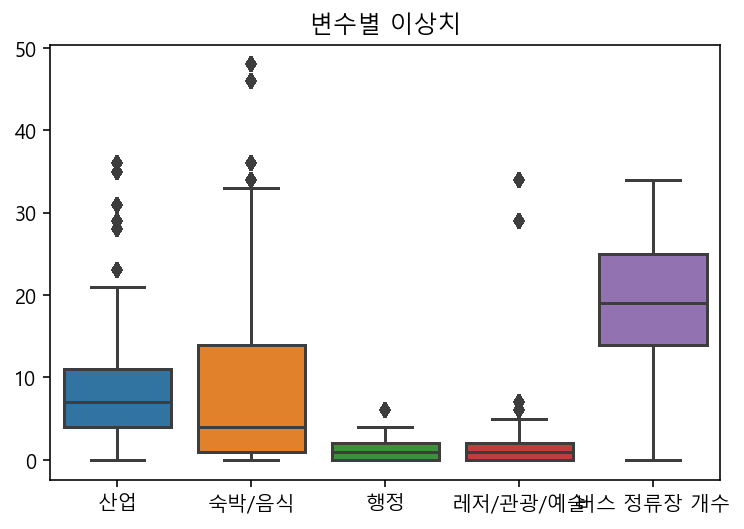

In [130]:
상업환승_a = 상업환승[['산업', '숙박/음식','행정', '레저/관광/예술', '버스 정류장 개수']]
import matplotlib.pyplot as plt
import seaborn as sns
a = sns.boxplot(data=상업환승_a)
a.set_title("변수별 이상치")

Text(0.5, 1.0, '변수별 이상치')

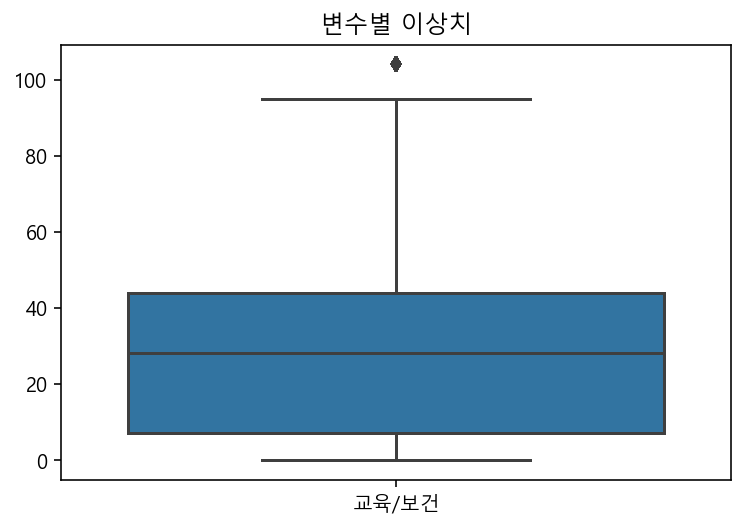

In [131]:
상업환승_a = 상업환승[['교육/보건']]
import matplotlib.pyplot as plt
import seaborn as sns
a = sns.boxplot(data=상업환승_a)
a.set_title("변수별 이상치")

# 전체 한파폭염

In [87]:
HC = 상업환승[(상업환승['최저기온'] <= -12) | (상업환승['최고기온'] >= 35)]

In [88]:
HC_g = HC.groupby('역명').mean().reset_index()

Text(0, 0.5, '총승객수')

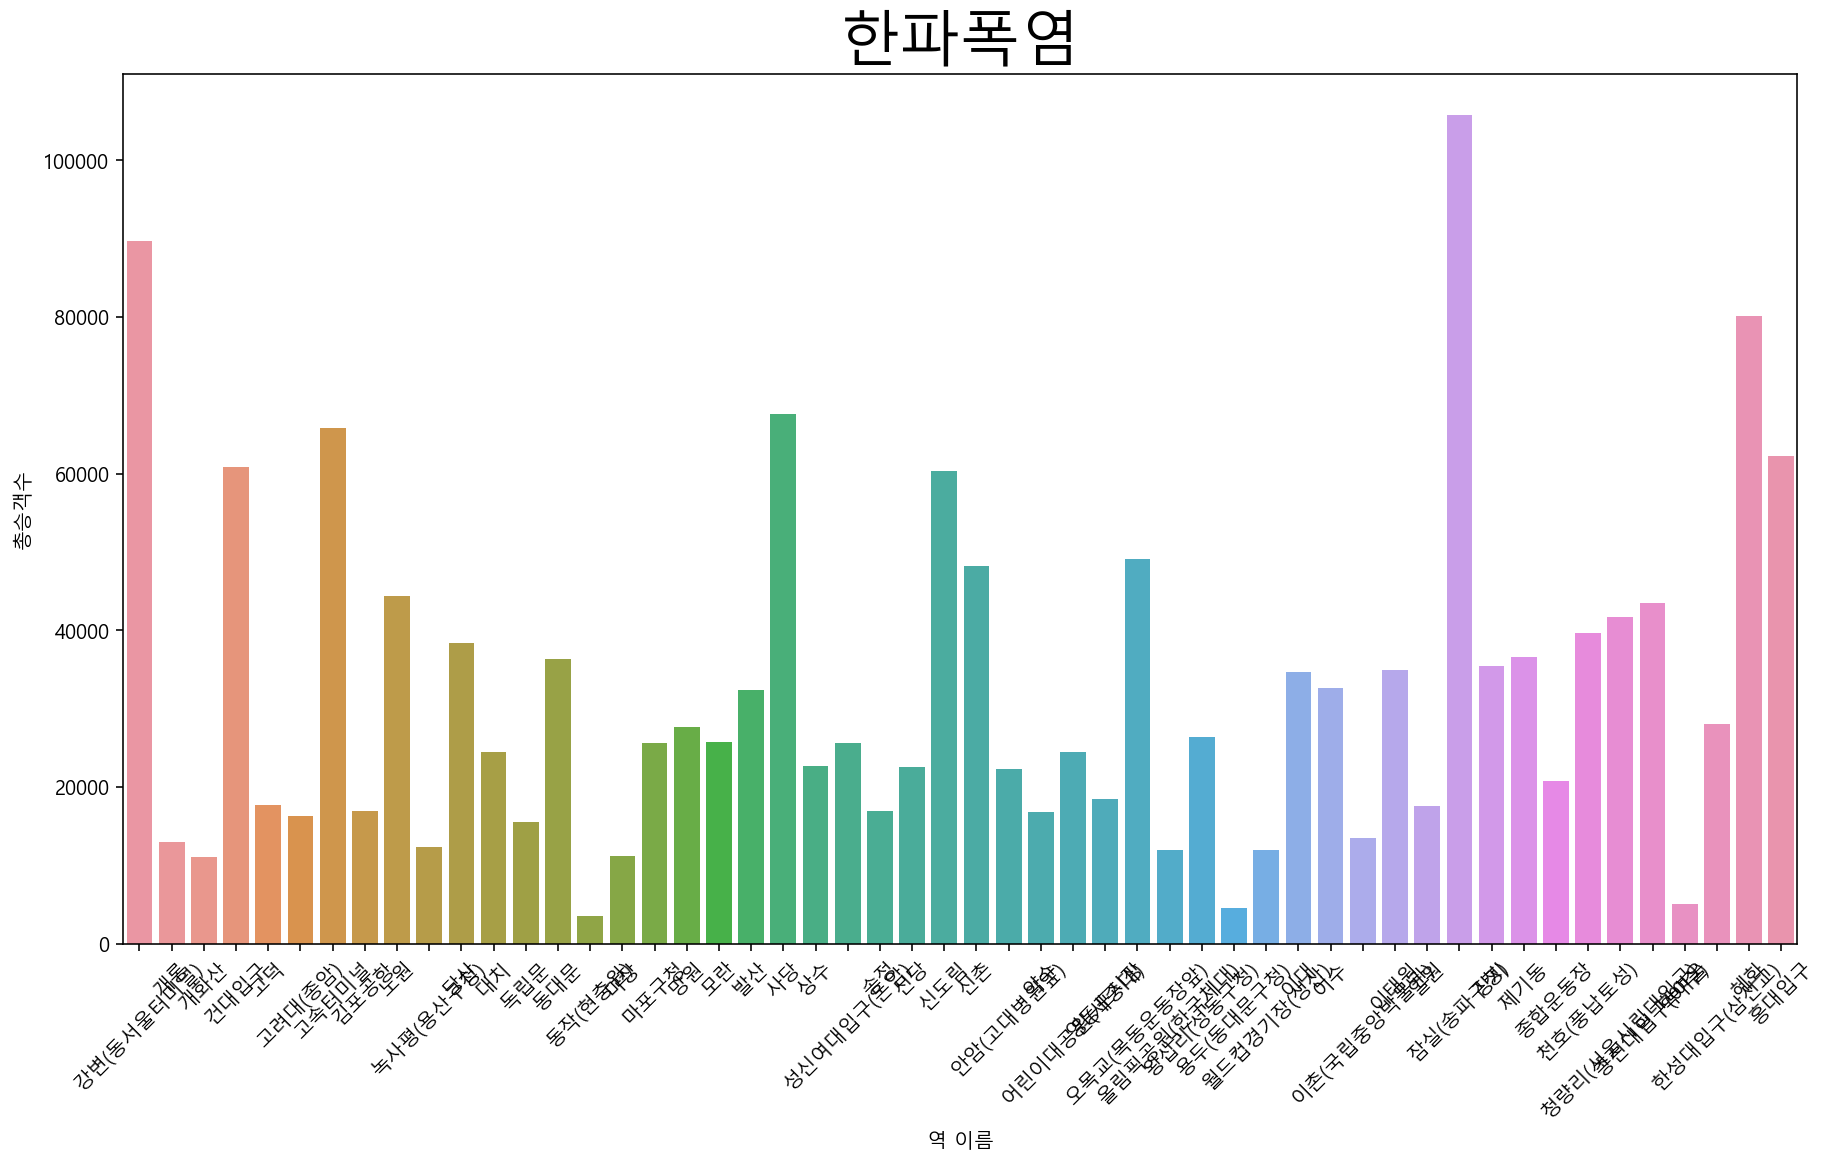

In [89]:
import seaborn as sns

sw_s = plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sw_s = plt.title('한파폭염', fontsize=30)
sw_s = sns.barplot(data=HC_g, x='역명', y='총승객수')
plt.xlabel("역 이름")
plt.ylabel("총승객수")

In [90]:
nomal = 상업환승[(상업환승['최저기온']  > -12) &  (상업환승['최고기온'] < 35)]

In [91]:
nomal_g = nomal.groupby('역명').mean().reset_index()

Text(0, 0.5, '총승객수')

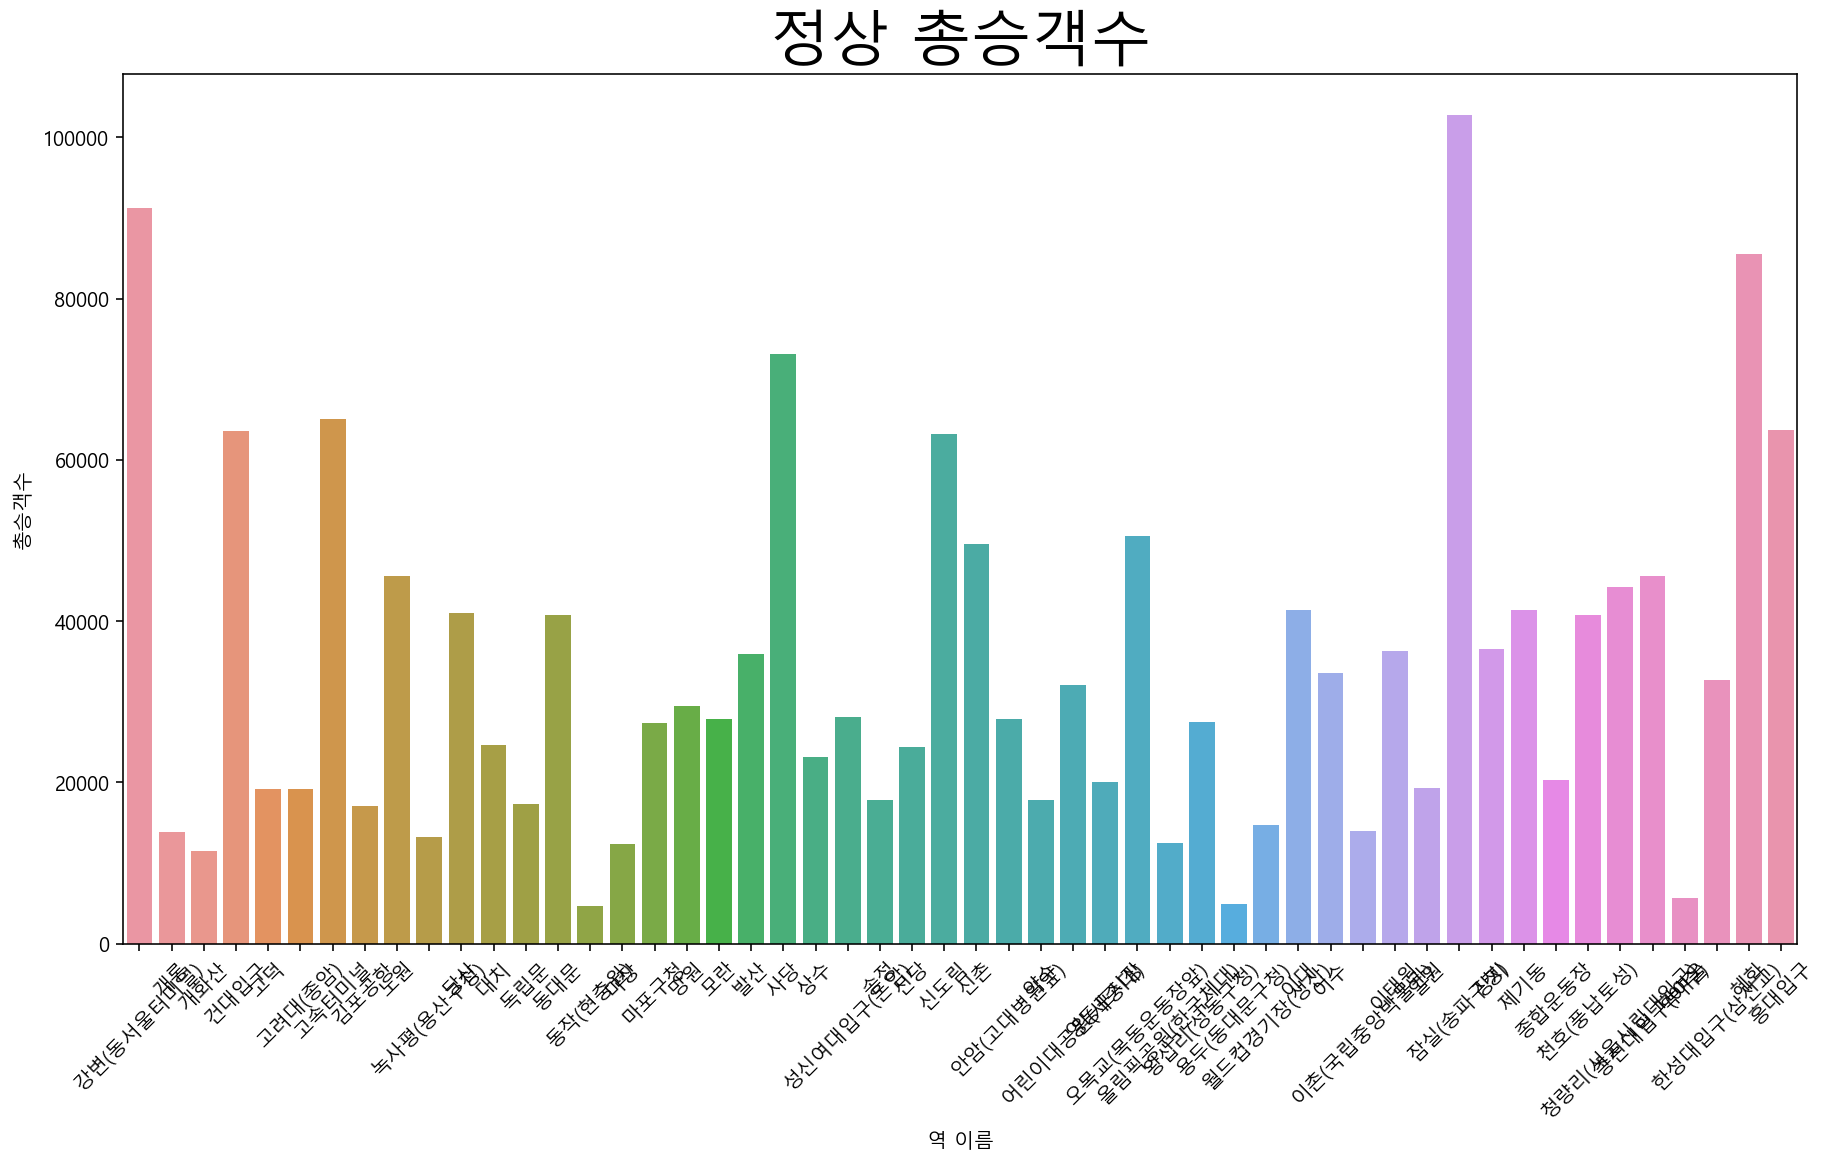

In [92]:
import seaborn as sns

sw_s = plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sw_s = plt.title('정상 총승객수', fontsize=30)
sw_s = sns.barplot(data=nomal_g, x='역명', y='총승객수')
plt.xlabel("역 이름")
plt.ylabel("총승객수")

In [93]:
nomal_gs = nomal_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)

In [94]:
nomal_gs = nomal_gs.rename(columns = {'총승객수':'정상'})

In [95]:
HC_gs = HC_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)

In [96]:
HC_gs = HC_gs.rename(columns = {'총승객수':'한파,폭염'})

In [97]:
merge_df = pd.merge(nomal_gs,HC_gs, on="역명")

In [98]:
merge_df

,역명,정상,"한파,폭염"
0,잠실(송파구청),102732.728863,105722.715909
1,강변(동서울터미널),91283.206997,89713.840909
2,혜화,85507.046647,80048.568182
3,사당,73161.044461,67605.102273
4,고속터미널,65093.824101,65812.946970
5,홍대입구,63668.908231,62284.052632
6,건대입구,63634.030612,60790.090909
7,신도림,63263.048834,60303.488636
8,오목교(목동운동장앞),50580.747813,49147.840909
9,신촌,49570.682216,48155.522727


In [99]:
merge_df1 = merge_df.set_index('역명')

Text(0.5, 1.0, '한파/폭염 여부에 따른 총승객수')

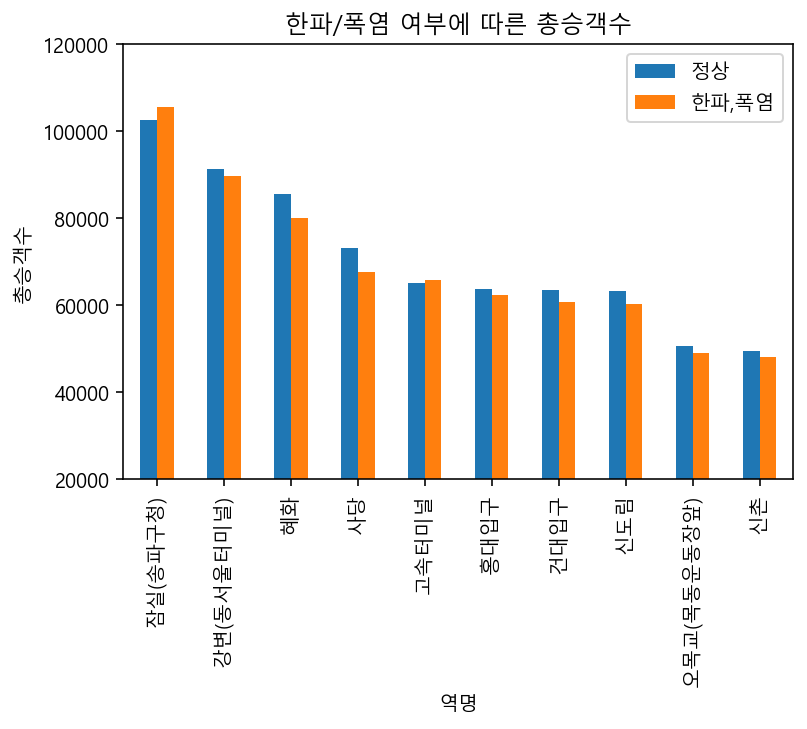

In [106]:
merge_df1[:10].plot.bar()
plt.xlim([-0.5, 9.5])
plt.ylim([20000, 120000])
plt.ylabel('총승객수')
plt.title('한파/폭염 여부에 따른 총승객수')

# 휴일 한파폭염

In [124]:
상업환승_Y = 상업환승[상업환승['휴일여부'] == 'Y']

In [125]:
HC = 상업환승_Y[(상업환승_Y['최저기온'] <= -12) | (상업환승_Y['최고기온'] >= 35)]

In [126]:
HC_g = HC.groupby('역명').mean().reset_index()

Text(0, 0.5, '총승객수')

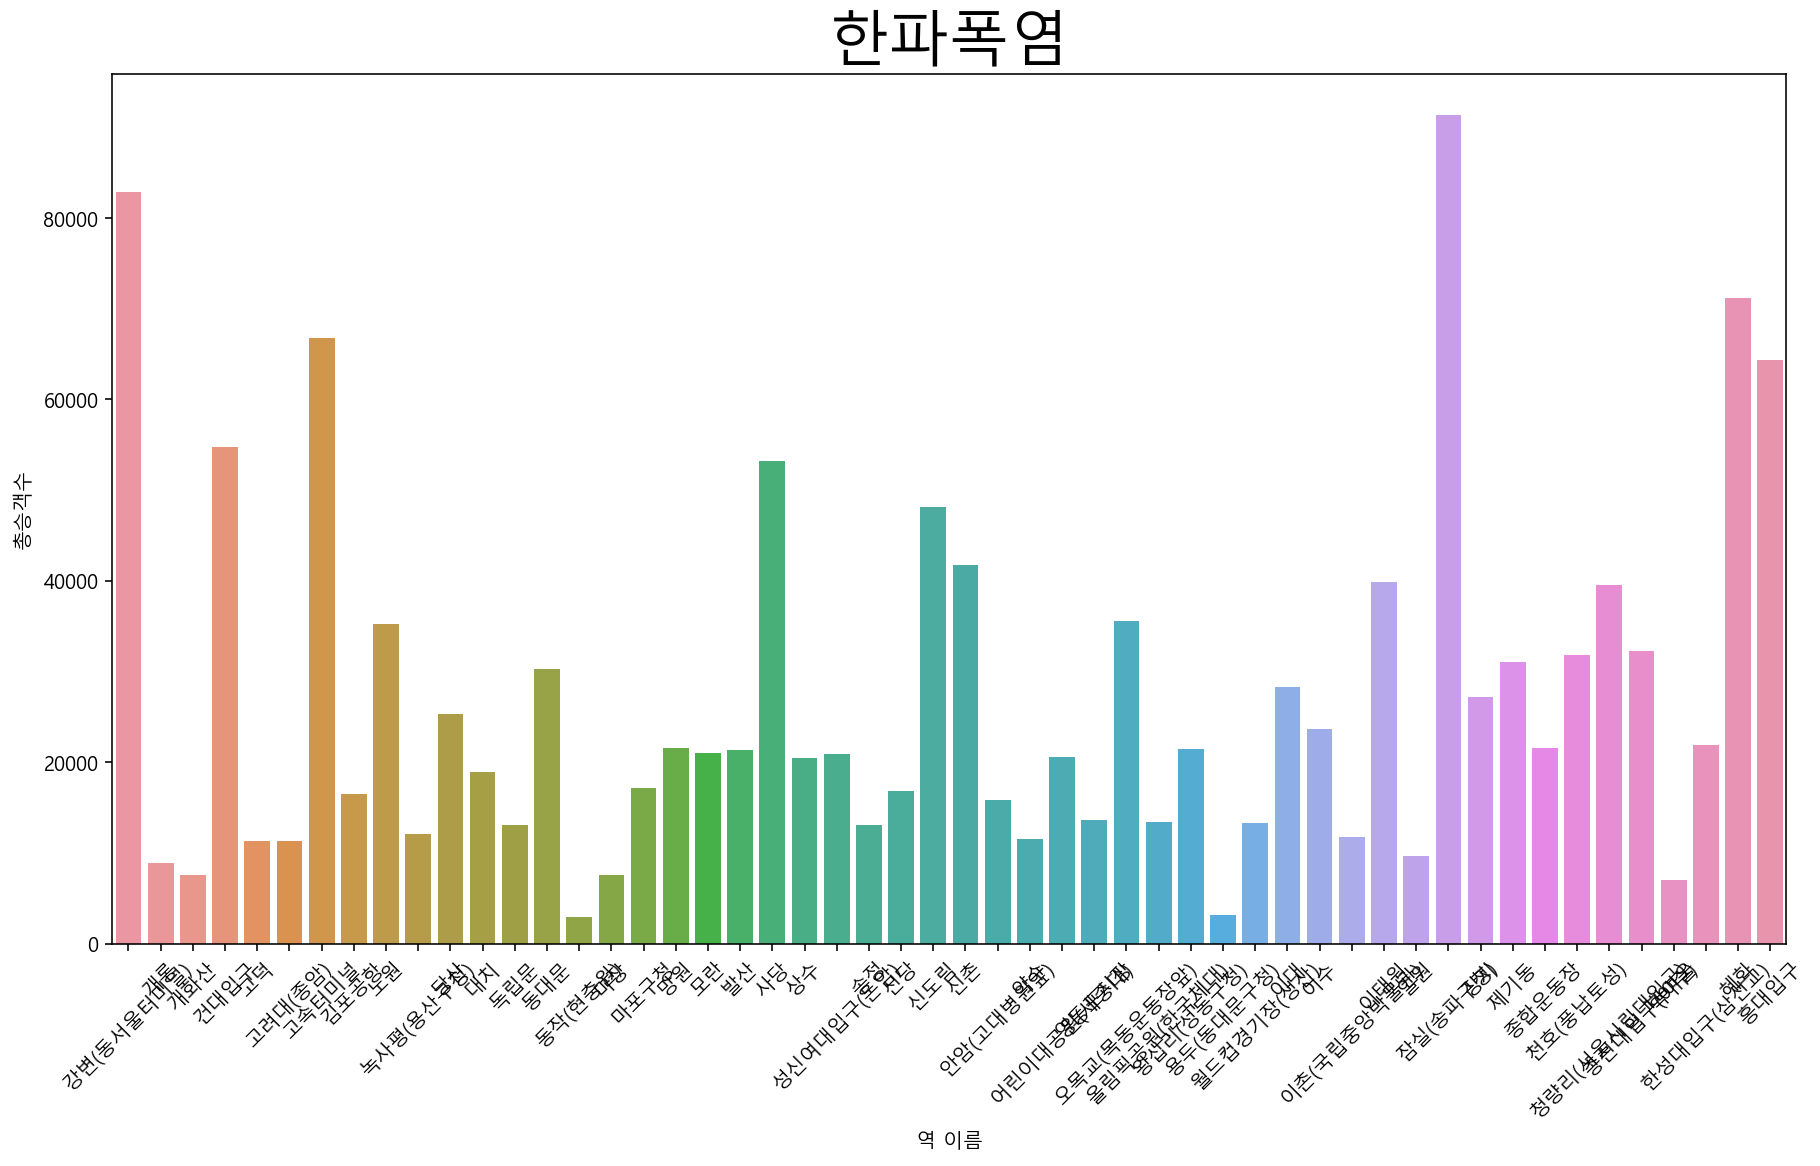

In [127]:
import seaborn as sns

sw_s = plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sw_s = plt.title('한파폭염', fontsize=30)
sw_s = sns.barplot(data=HC_g, x='역명', y='총승객수')
plt.xlabel("역 이름")
plt.ylabel("총승객수")

In [128]:
nomal = 상업환승_Y[(상업환승_Y['최저기온']  > -12) &  (상업환승_Y['최고기온'] < 35)]

In [129]:
nomal_g = nomal.groupby('역명').mean().reset_index()

Text(0, 0.5, '총승객수')

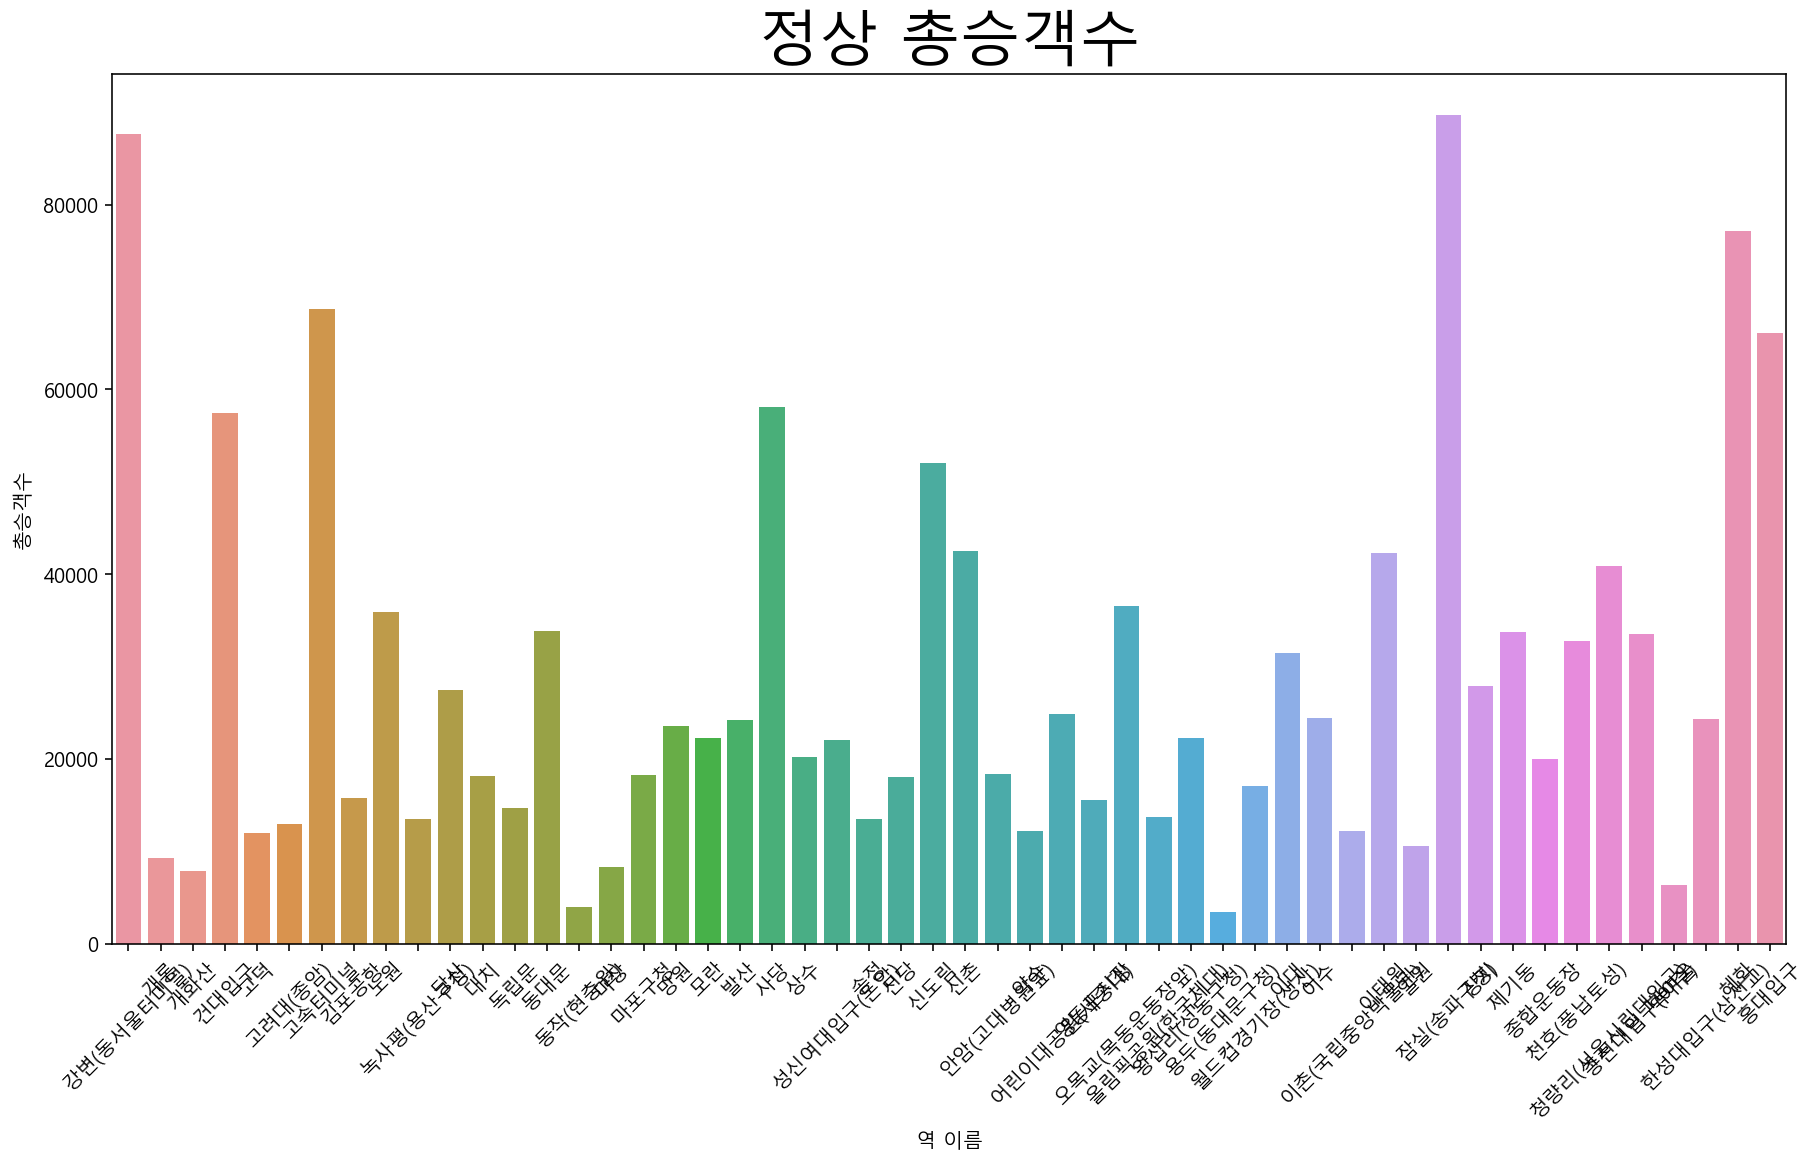

In [130]:
import seaborn as sns

sw_s = plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sw_s = plt.title('정상 총승객수', fontsize=30)
sw_s = sns.barplot(data=nomal_g, x='역명', y='총승객수')
plt.xlabel("역 이름")
plt.ylabel("총승객수")

In [131]:
nomal_gs = nomal_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)

In [132]:
nomal_gs = nomal_gs.rename(columns = {'총승객수':'정상'})

In [133]:
HC_gs = HC_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)

In [134]:
HC_gs = HC_gs.rename(columns = {'총승객수':'한파,폭염'})

In [135]:
merge_df = pd.merge(nomal_gs,HC_gs, on="역명")

In [136]:
merge_df

,역명,정상,"한파,폭염"
0,잠실(송파구청),89670.024664,91323.730769
1,강변(동서울터미널),87621.991031,82864.000000
2,혜화,77156.147982,71235.769231
3,고속터미널,68726.771300,66781.974359
4,홍대입구,66140.881849,64302.974359
5,사당,58121.040359,53209.730769
6,건대입구,57448.334081,54717.230769
7,신도림,52006.775785,48126.384615
8,신촌,42506.224215,41722.692308
9,이태원,42304.300448,39840.923077


In [137]:
merge_df2 = merge_df.set_index('역명')

Text(0.5, 1.0, '휴일날 한파/폭염 여부에 따른 총승객수')

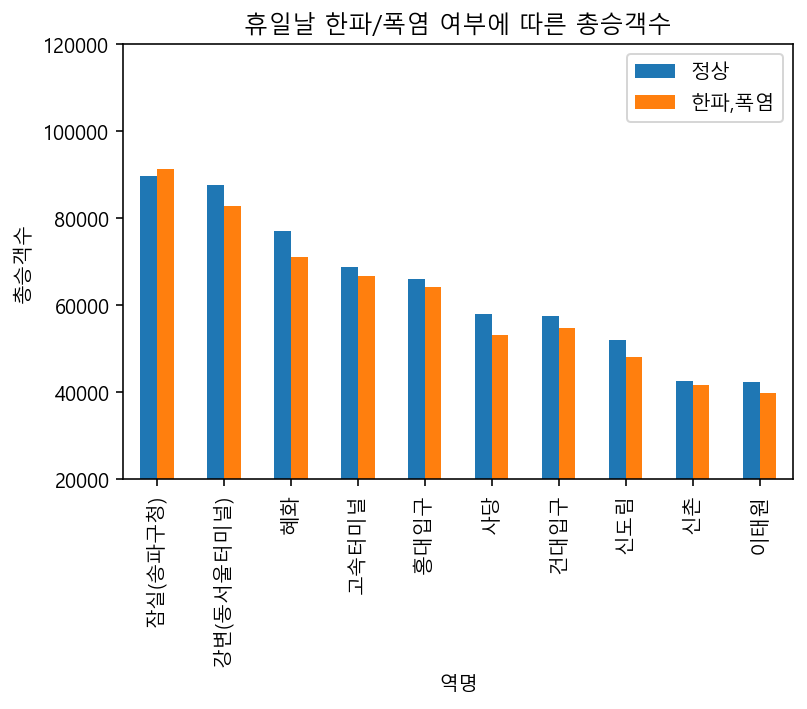

In [139]:
merge_df2[:10].plot.bar()
plt.xlim([-0.5, 9.5])
plt.ylim([20000, 120000])
plt.ylabel('총승객수')
plt.title('휴일날 한파/폭염 여부에 따른 총승객수')

# 평일 한파폭염

In [159]:
상업환승_N = 상업환승[상업환승['휴일여부'] == 'N']

In [160]:
HC = 상업환승_N[(상업환승_N['최저기온'] <= -12) | (상업환승_N['최고기온'] >= 35)]

In [161]:
HC_g = HC.groupby('역명').mean().reset_index()

Text(0, 0.5, '총승객수')

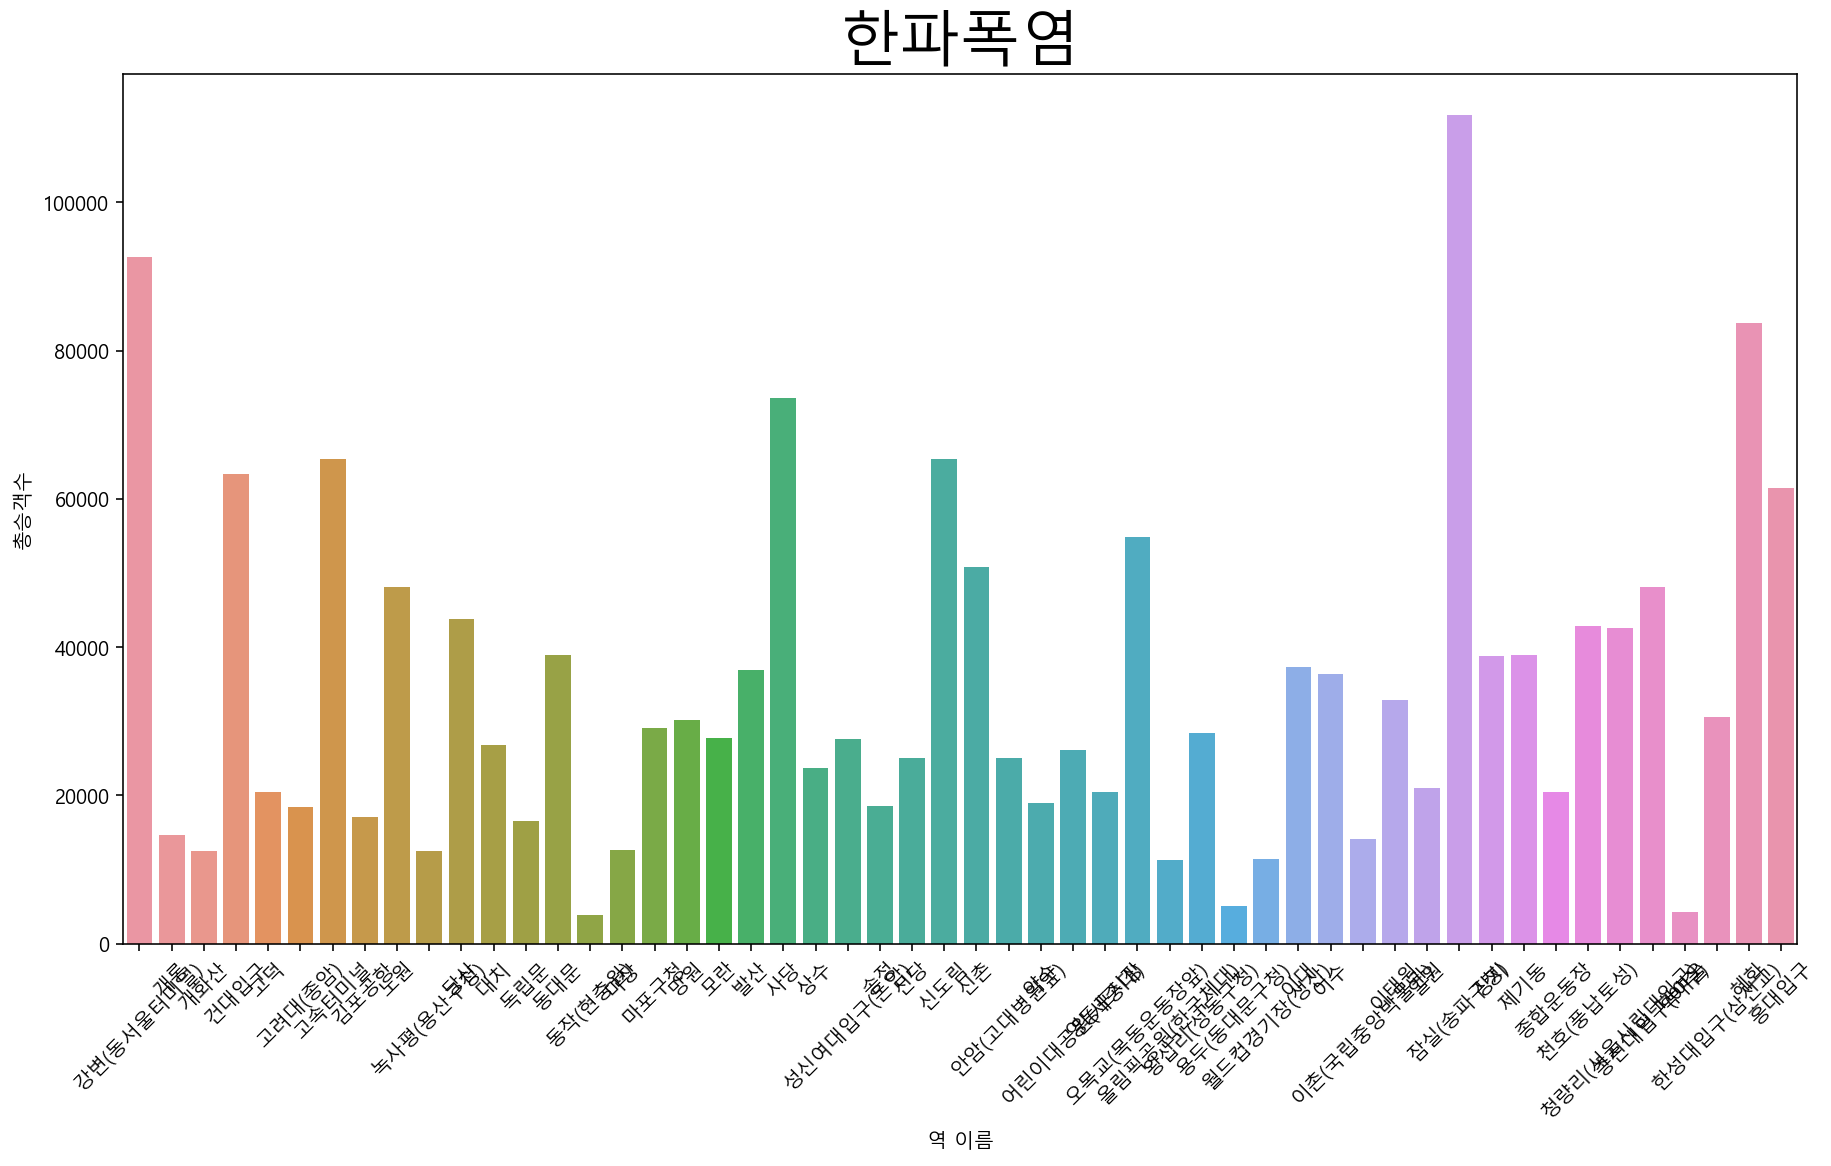

In [162]:
import seaborn as sns

sw_s = plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sw_s = plt.title('한파폭염', fontsize=30)
sw_s = sns.barplot(data=HC_g, x='역명', y='총승객수')
plt.xlabel("역 이름")
plt.ylabel("총승객수")

In [163]:
nomal = 상업환승_N[(상업환승_N['최저기온']  > -12) &  (상업환승_N['최고기온'] < 35)]

In [164]:
nomal_g = nomal.groupby('역명').mean().reset_index()

Text(0, 0.5, '총승객수')

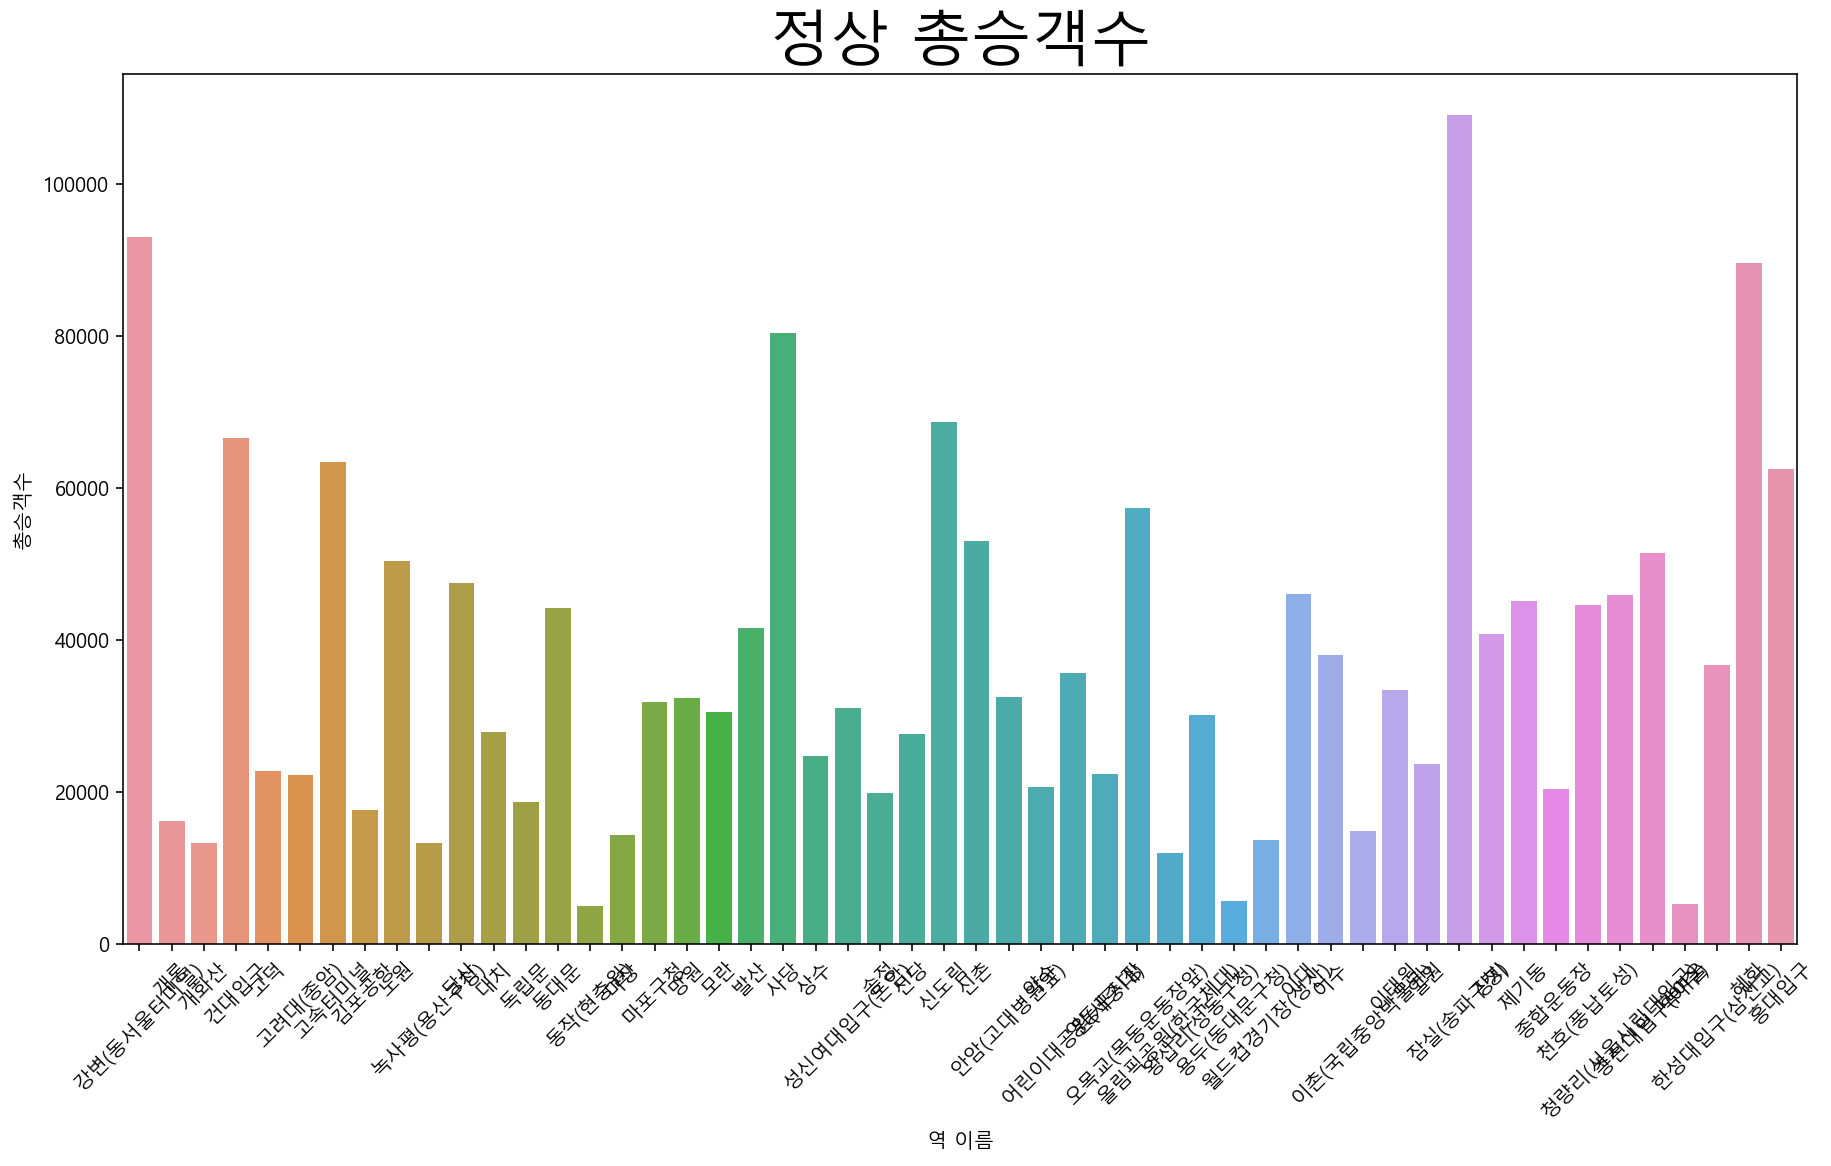

In [165]:
import seaborn as sns

sw_s = plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sw_s = plt.title('정상 총승객수', fontsize=30)
sw_s = sns.barplot(data=nomal_g, x='역명', y='총승객수')
plt.xlabel("역 이름")
plt.ylabel("총승객수")

In [166]:
nomal_gs = nomal_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)

In [167]:
nomal_gs = nomal_gs.rename(columns = {'총승객수':'정상'})

In [168]:
HC_gs = HC_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)

In [169]:
HC_gs = HC_gs.rename(columns = {'총승객수':'한파,폭염'})

In [170]:
merge_df = pd.merge(nomal_gs,HC_gs, on="역명")

In [171]:
merge_df

,역명,정상,"한파,폭염"
0,잠실(송파구청),109024.268898,111761.000000
1,강변(동서울터미널),93046.600432,92586.354839
2,혜화,89529.185745,83744.258065
3,사당,80404.934125,73641.870968
4,신도림,68684.536717,65410.016129
5,건대입구,66613.318575,63336.774194
6,고속터미널,63344.046076,65406.580645
7,홍대입구,62479.754530,61446.414894
8,오목교(목동운동장앞),57356.980562,54830.419355
9,신촌,52973.218143,50853.161290


In [172]:
merge_df3 = merge_df.set_index('역명')

Text(0.5, 1.0, '평일 한파/폭염 여부에 따른 총승객수')

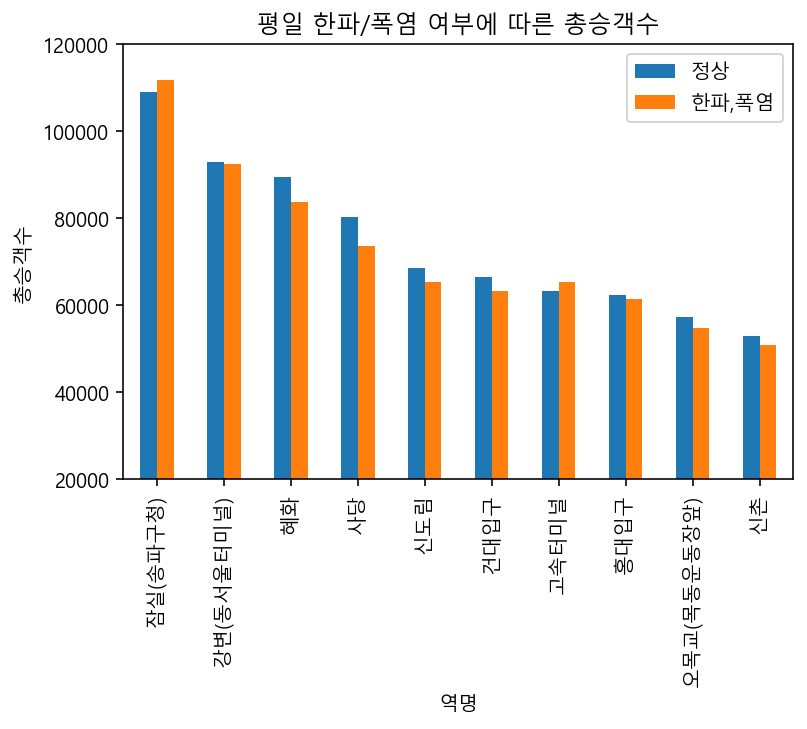

In [173]:
merge_df3[:10].plot.bar()
plt.xlim([-0.5, 9.5])
plt.ylim([20000, 120000])
plt.ylabel('총승객수')
plt.title('평일 한파/폭염 여부에 따른 총승객수')

# 계절별

### 전체

In [7]:
def cat(month): 
    if month == 1 or month == 2 or month == 12:
        return '겨울'
    elif month == 3 or month == 4 or month == 5:
        return '봄'
    elif month == 6 or month == 7 or month == 8:
        return '여름'
    elif month == 9 or month == 10 or month == 11:
        return '가을'

In [8]:
상업환승['계절'] = 상업환승['month'].map(cat)

In [9]:
상업환승['계절'] = 상업환승['계절'].map({'봄':0,
                             '여름':1,
                             '가을':2,
                             '겨울':3},
                             na_action=None)

In [10]:
봄 = 상업환승[상업환승['계절'] == 0]
여름 = 상업환승[상업환승['계절'] == 1]
가을 = 상업환승[상업환승['계절'] == 2]
겨울 = 상업환승[상업환승['계절'] == 3]

In [11]:
상업환승['계절'].value_counts()

0    14330
1    14296
2    13956
3    13934
Name: 계절, dtype: int64

In [12]:
봄_g = 봄.groupby('역명').mean().reset_index()
여름_g = 여름.groupby('역명').mean().reset_index()
가을_g = 가을.groupby('역명').mean().reset_index()
겨울_g = 겨울.groupby('역명').mean().reset_index()

In [13]:
봄_g = 봄_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
봄_g = 봄_g.rename(columns = {'총승객수':'봄'})

In [14]:
여름_g = 여름_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
여름_g = 여름_g.rename(columns = {'총승객수':'여름'})

In [15]:
가을_g = 가을_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
가을_g = 가을_g.rename(columns = {'총승객수':'가을'})

In [16]:
겨울_g = 겨울_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
겨울_g = 겨울_g.rename(columns = {'총승객수':'겨울'})

In [17]:
merge_df = pd.merge(봄_g,여름_g, on="역명")
merge_df = pd.merge(merge_df,가을_g, on="역명")
merge_df = pd.merge(merge_df,겨울_g, on="역명")

In [18]:
merge_df

,역명,봄,여름,가을,겨울
0,잠실(송파구청),105003.923913,101734.206522,102516.425824,102381.366667
1,강변(동서울터미널),93320.739130,89723.635870,91531.598901,90159.850000
2,혜화,87367.798913,82157.369565,86454.340659,84736.944444
3,사당,75785.184783,70505.972826,73465.947802,71526.252778
4,건대입구,67002.692935,61763.668478,63032.431319,62015.533333
5,고속터미널,65623.583333,64773.480072,65457.249084,64688.077778
6,홍대입구,65402.833935,63260.591727,62480.937500,62608.017660
7,신도림,64920.277174,61877.339674,63814.483516,61704.486111
8,오목교(목동운동장앞),51905.532609,49390.429348,50533.785714,50140.511111
9,신촌,51867.233696,48113.176630,49612.758242,48324.519444


In [19]:
merge_df4 = merge_df.set_index('역명')

Text(0.5, 1.0, '역별 계절에 따른 총승객수')

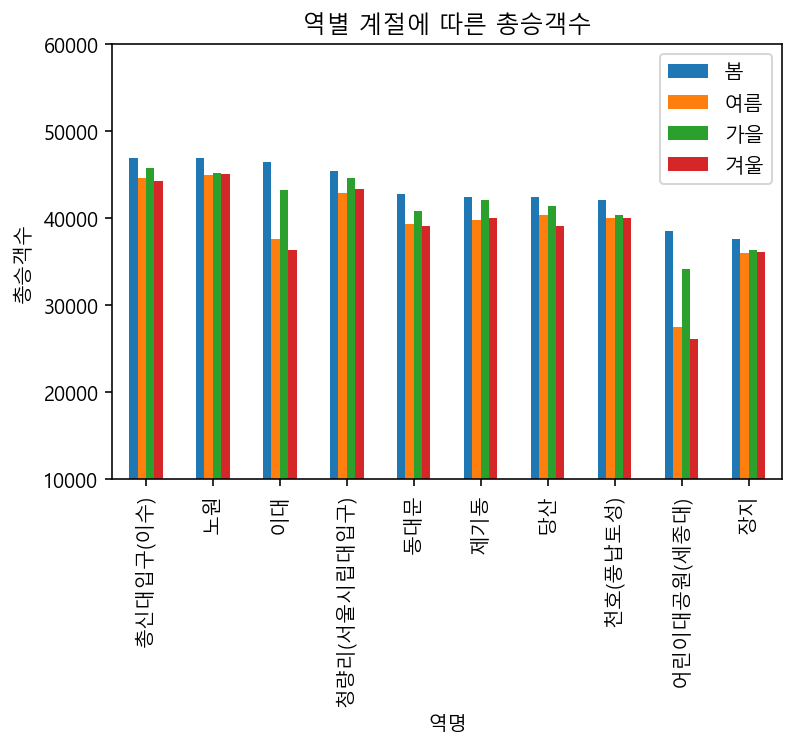

In [20]:
merge_df4[10:20].plot.bar()
plt.xlim([-0.5, 9.5])
plt.ylim([10000, 60000])
plt.ylabel("총승객수")
plt.title("역별 계절에 따른 총승객수")

Text(0, 0.5, '총승객수')

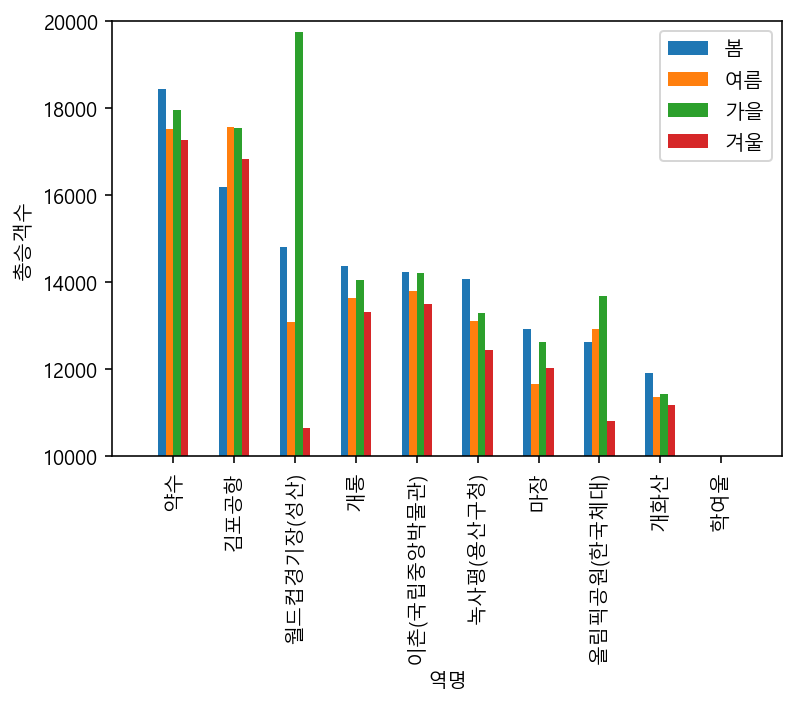

In [49]:
merge_df4[40:50].plot.bar()
plt.xlim([-1, 10])
plt.ylim([10000, 20000])
plt.ylabel("총승객수")

### 주말

In [194]:
상업환승_Y = 상업환승[상업환승['휴일여부'] == 'Y']

In [195]:
def cat(month):
    if month == 1 or month == 2 or month == 12:
        return '겨울'
    elif month == 3 or month == 4 or month == 5:
        return '봄'
    elif month == 6 or month == 7 or month == 8:
        return '여름'
    elif month == 9 or month == 10 or month == 11:
        return '가을'

In [196]:
상업환승_Y['계절'] = 상업환승_Y['month'].map(cat)

C:\Users\lhj\AppData\Local\Temp\ipykernel_12096\2455550224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  상업환승_Y['계절'] = 상업환승_Y['month'].map(cat)


In [197]:
상업환승_Y['계절'] = 상업환승_Y['계절'].map({'봄':0,
                             '여름':1,
                             '가을':2,
                             '겨울':3},
                             na_action=None)

C:\Users\lhj\AppData\Local\Temp\ipykernel_12096\2923602738.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  상업환승_Y['계절'] = 상업환승_Y['계절'].map({'봄':0,


In [198]:
봄 = 상업환승_Y[상업환승_Y['계절'] == 0]
여름 = 상업환승_Y[상업환승_Y['계절'] == 1]
가을 = 상업환승_Y[상업환승_Y['계절'] == 2]
겨울 = 상업환승_Y[상업환승_Y['계절'] == 3]

In [199]:
봄_g = 봄.groupby('역명').mean().reset_index()
여름_g = 여름.groupby('역명').mean().reset_index()
가을_g = 가을.groupby('역명').mean().reset_index()
겨울_g = 겨울.groupby('역명').mean().reset_index()

In [200]:
봄_g = 봄_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
봄_g = 봄_g.rename(columns = {'총승객수':'총승객수_봄'})

In [201]:
여름_g = 여름_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
여름_g = 여름_g.rename(columns = {'총승객수':'총승객수_여름'})

In [202]:
가을_g = 가을_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
가을_g = 가을_g.rename(columns = {'총승객수':'총승객수_가을'})

In [203]:
겨울_g = 겨울_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
겨울_g = 겨울_g.rename(columns = {'총승객수':'총승객수_겨울'})

In [204]:
merge_df = pd.merge(봄_g,여름_g, on="역명")
merge_df = pd.merge(merge_df,가을_g, on="역명")
merge_df = pd.merge(merge_df,겨울_g, on="역명")

In [205]:
merge_df

,역명,총승객수_봄,총승객수_여름,총승객수_가을,총승객수_겨울
0,잠실(송파구청),96440.710526,87748.166667,90136.211864,85059.616667
1,강변(동서울터미널),93024.017544,84329.033333,89534.966102,82871.033333
2,혜화,79329.631579,74990.000000,78822.355932,74336.300000
3,고속터미널,72884.906433,66741.011111,70493.570621,64603.577778
4,홍대입구,70449.567251,65515.633333,64618.525000,62764.328947
5,건대입구,62667.035088,56181.658333,56774.932203,53827.683333
6,사당,61179.342105,56923.808333,58620.330508,54857.800000
7,신도림,54545.622807,50884.758333,52926.500000,48971.741667
8,신촌,45534.447368,41588.325000,42655.652542,40230.608333
9,이태원,44078.473684,39755.050000,45044.135593,39940.183333


In [206]:
merge_df4 = merge_df.set_index('역명')

(10000.0, 60000.0)

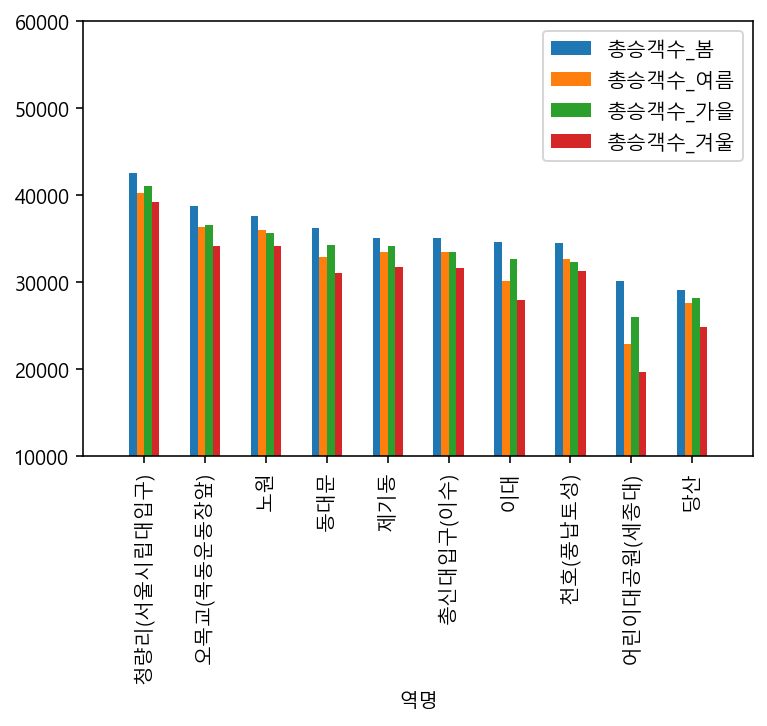

In [207]:
merge_df4[10:20].plot.bar()
plt.xlim([-1, 10])
plt.ylim([10000, 60000])

### 평일

In [589]:
상업환승_N = 상업환승[상업환승['휴일여부'] == 'N']

In [590]:
def cat(month):
    if month == 1 or month == 2 or month == 12:
        return '겨울'
    elif month == 3 or month == 4 or month == 5:
        return '봄'
    elif month == 6 or month == 7 or month == 8:
        return '여름'
    elif month == 9 or month == 10 or month == 11:
        return '가을'

In [591]:
상업환승_N['계절'] = 상업환승_N['month'].map(cat)

C:\Users\lhj\AppData\Local\Temp\ipykernel_24800\675153033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  상업환승_N['계절'] = 상업환승_N['month'].map(cat)


In [592]:
상업환승_N['계절'] = 상업환승_N['계절'].map({'봄':0,
                             '여름':1,
                             '가을':2,
                             '겨울':3},
                             na_action=None)

C:\Users\lhj\AppData\Local\Temp\ipykernel_24800\1283410255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  상업환승_N['계절'] = 상업환승_N['계절'].map({'봄':0,


In [593]:
봄 = 상업환승_N[상업환승_N['계절'] == 0]
여름 = 상업환승_N[상업환승_N['계절'] == 1]
가을 = 상업환승_N[상업환승_N['계절'] == 2]
겨울 = 상업환승_N[상업환승_N['계절'] == 3]

In [594]:
봄_g = 봄.groupby('역명').mean().reset_index()
여름_g = 여름.groupby('역명').mean().reset_index()
가을_g = 가을.groupby('역명').mean().reset_index()
겨울_g = 겨울.groupby('역명').mean().reset_index()

In [595]:
봄_g = 봄_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
봄_g = 봄_g.rename(columns = {'총승객수':'총승객수_봄'})

In [596]:
여름_g = 여름_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
여름_g = 여름_g.rename(columns = {'총승객수':'총승객수_여름'})

In [597]:
가을_g = 가을_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
가을_g = 가을_g.rename(columns = {'총승객수':'총승객수_가을'})

In [598]:
겨울_g = 겨울_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
겨울_g = 겨울_g.rename(columns = {'총승객수':'총승객수_겨울'})

In [599]:
merge_df = pd.merge(봄_g,여름_g, on="역명")
merge_df = pd.merge(merge_df,가을_g, on="역명")
merge_df = pd.merge(merge_df,겨울_g, on="역명")

In [600]:
merge_df

,역명,총승객수_봄,총승객수_여름,총승객수_가을,총승객수_겨울
0,잠실(송파구청),108847.255906,108501.645161,108454.902439,111042.241667
1,강변(동서울터미널),93453.913386,92333.927419,92489.333333,93804.258333
2,혜화,90975.480315,85625.451613,90115.211382,89937.266667
3,사당,82340.562992,77077.987903,80587.016260,79860.479167
4,신도림,69576.618110,67196.330645,69037.174797,68070.858333
5,건대입구,68948.618110,64464.641129,66033.995935,66109.458333
6,홍대입구,63149.592689,62181.050532,61446.620968,62529.083056
7,고속터미널,62364.564304,63821.448925,63041.452575,64730.327778
8,오목교(목동운동장앞),57786.236220,55673.887097,57227.642276,58121.758333
9,신촌,54709.507874,51270.362903,52949.906504,52371.475000


In [601]:
merge_df4 = merge_df.set_index('역명')

(10000.0, 120000.0)

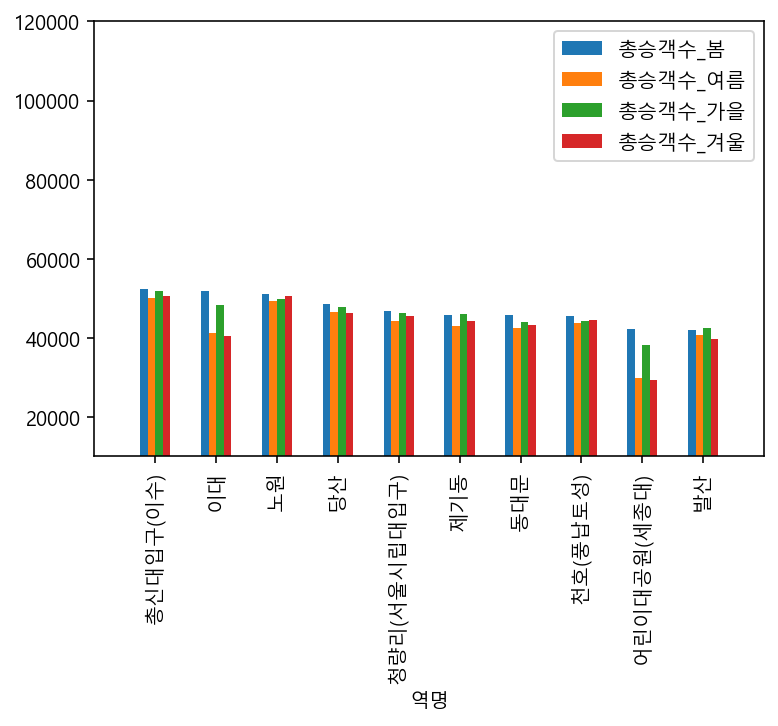

In [603]:
merge_df4[10:20].plot.bar()
plt.xlim([-1, 10])
plt.ylim([10000, 120000])

# 1일우량

### 평일 강수량

In [28]:
상업환승_N = 상업환승[상업환승['휴일여부'] == 'N']

In [29]:
def rain(rainfall):
    if rainfall == 0:
        return '비 안옴'
    elif rainfall < 20:
        return '약한 비'
    elif rainfall > 20 and rainfall < 50:
        return '보통 비'
    elif rainfall > 50:
        return '강한 비'
    

상업환승_N['1일우량'] = 상업환승_N['일강수량'].map(rain)

C:\Users\lhj\AppData\Local\Temp\ipykernel_23312\1871237690.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  상업환승_N['1일우량'] = 상업환승_N['일강수량'].map(rain)


In [30]:
비안옴 = 상업환승_N[상업환승_N['1일우량'] == '비 안옴']
약한비 = 상업환승_N[상업환승_N['1일우량'] == '약한 비']
보통비 = 상업환승_N[상업환승_N['1일우량'] == '보통 비']
강한비 = 상업환승_N[상업환승_N['1일우량'] == '강한 비']

In [31]:
비안옴_g = 비안옴.groupby('역명').mean().reset_index()
약한비_g = 약한비.groupby('역명').mean().reset_index()
보통비_g = 보통비.groupby('역명').mean().reset_index()
강한비_g = 강한비.groupby('역명').mean().reset_index()

In [32]:
비안옴_g = 비안옴_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
비안옴_g = 비안옴_g.rename(columns = {'총승객수':'비안옴'})

In [33]:
약한비_g = 약한비_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
약한비_g = 약한비_g.rename(columns = {'총승객수':'약한비'})

In [34]:
보통비_g = 보통비_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
보통비_g = 보통비_g.rename(columns = {'총승객수':'보통비'})

In [35]:
강한비_g = 강한비_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
강한비_g = 강한비_g.rename(columns = {'총승객수':'강한비'})

In [36]:
merge_df_4 = pd.merge(비안옴_g, 약한비_g, on="역명")
merge_df_4 = pd.merge(merge_df_4,보통비_g, on="역명")
merge_df_4 = pd.merge(merge_df_4,강한비_g, on="역명")

In [37]:
merge_df5 = merge_df_4.set_index('역명')

Text(0.5, 1.0, '역별 강수량에 따른 총 승객수')

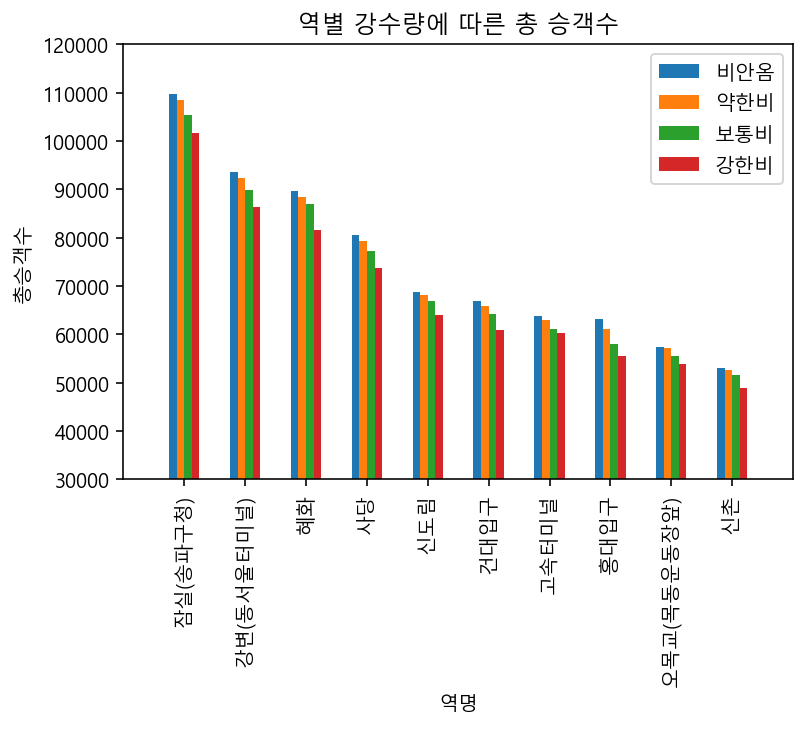

In [38]:
merge_df5[:10].plot.bar()
plt.xlim([-1, 10])
plt.ylim([30000, 120000])
plt.ylabel("총승객수")
plt.title("역별 강수량에 따른 총 승객수")

Text(0.5, 1.0, '역별 강수량에 따른 총 승객수')

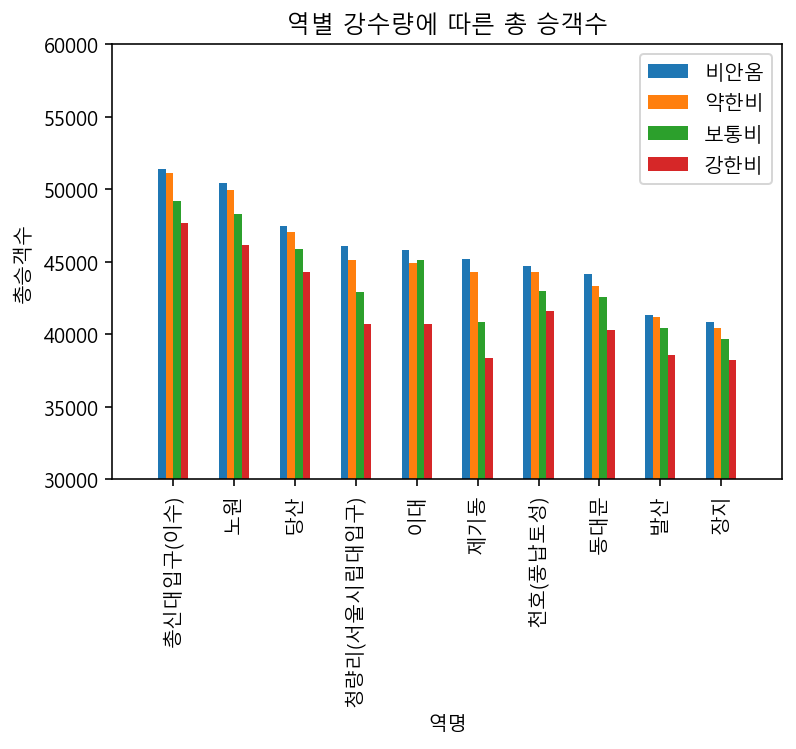

In [42]:
merge_df5[10:20].plot.bar()
plt.xlim([-1, 10])
plt.ylim([30000, 60000])
plt.ylabel("총승객수")
plt.title("역별 강수량에 따른 총 승객수")

### 2개

In [241]:
merge_df = pd.merge(비안옴_g,강한비_g, on="역명")
#merge_df = pd.merge(merge_df,보통비_g, on="역명")
#merge_df = pd.merge(merge_df,강한비_g, on="역명")

In [242]:
merge_df5 = merge_df.set_index('역명')

Text(0.5, 1.0, '역별 강한비와 비안올때 총승개수')

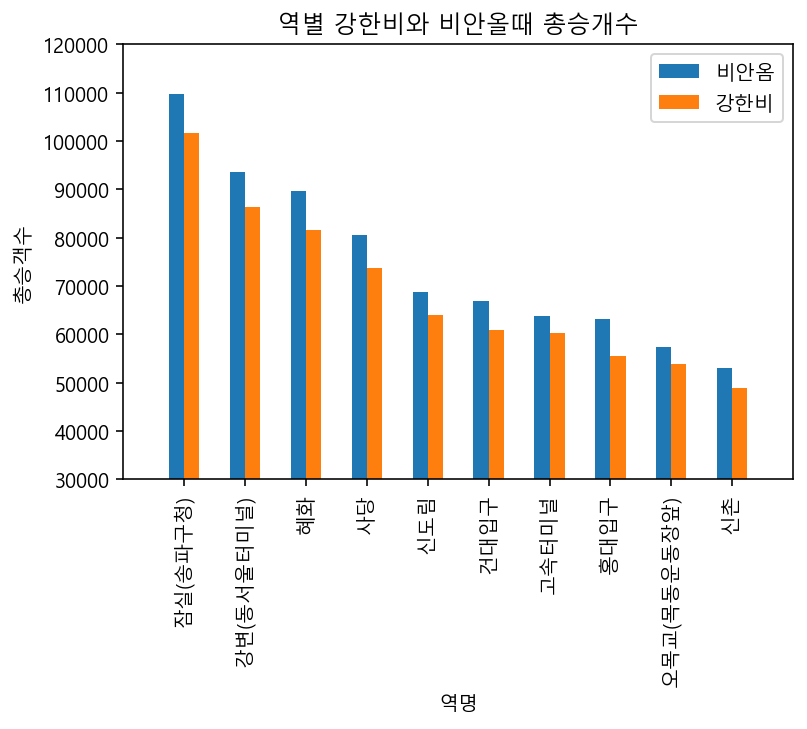

In [245]:
merge_df5[:10].plot.bar()
plt.xlim([-1, 10])
plt.ylim([30000, 120000])
plt.ylabel("총승객수")
plt.title("역별 강한비와 비안올때 총승개수")

### 휴일 강수량

In [185]:
상업환승_Y = 상업환승[상업환승['휴일여부'] == 'Y']

In [186]:
def rain(rainfall):
    if rainfall == 0:
        return '비 안옴'
    elif rainfall < 20:
        return '약한 비'
    elif rainfall > 20 and rainfall < 50:
        return '보통 비'
    elif rainfall > 50:
        return '강한 비'


상업환승_Y['1일우량'] = 상업환승_Y['일강수량'].map(rain)

C:\Users\lhj\AppData\Local\Temp\ipykernel_22452\1179403125.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  상업환승_Y['1일우량'] = 상업환승_Y['일강수량'].map(rain)


In [187]:
비안옴 = 상업환승_Y[상업환승_Y['1일우량'] == '비 안옴']
약한비 = 상업환승_Y[상업환승_Y['1일우량'] == '약한 비']
보통비 = 상업환승_Y[상업환승_Y['1일우량'] == '보통 비']
강한비 = 상업환승_Y[상업환승_Y['1일우량'] == '강한 비']

In [188]:
비안옴_g = 비안옴.groupby('역명').mean().reset_index()
약한비_g = 약한비.groupby('역명').mean().reset_index()
보통비_g = 보통비.groupby('역명').mean().reset_index()
강한비_g = 강한비.groupby('역명').mean().reset_index()

In [189]:
비안옴_g = 비안옴_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
비안옴_g = 비안옴_g.rename(columns = {'총승객수':'비안옴'})

In [190]:
약한비_g = 약한비_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
약한비_g = 약한비_g.rename(columns = {'총승객수':'약한비'})

In [191]:
보통비_g = 보통비_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
보통비_g = 보통비_g.rename(columns = {'총승객수':'보통비'})

In [192]:
강한비_g = 강한비_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
강한비_g = 강한비_g.rename(columns = {'총승객수':'강한비'})

In [193]:
merge_df_4 = pd.merge(비안옴_g,약한비_g, on="역명")
merge_df_4 = pd.merge(merge_df_4,보통비_g, on="역명")
merge_df_4 = pd.merge(merge_df_4,강한비_g, on="역명")

Text(0.5, 1.0, '휴일날 역별 강수량에 따른 총승객수')

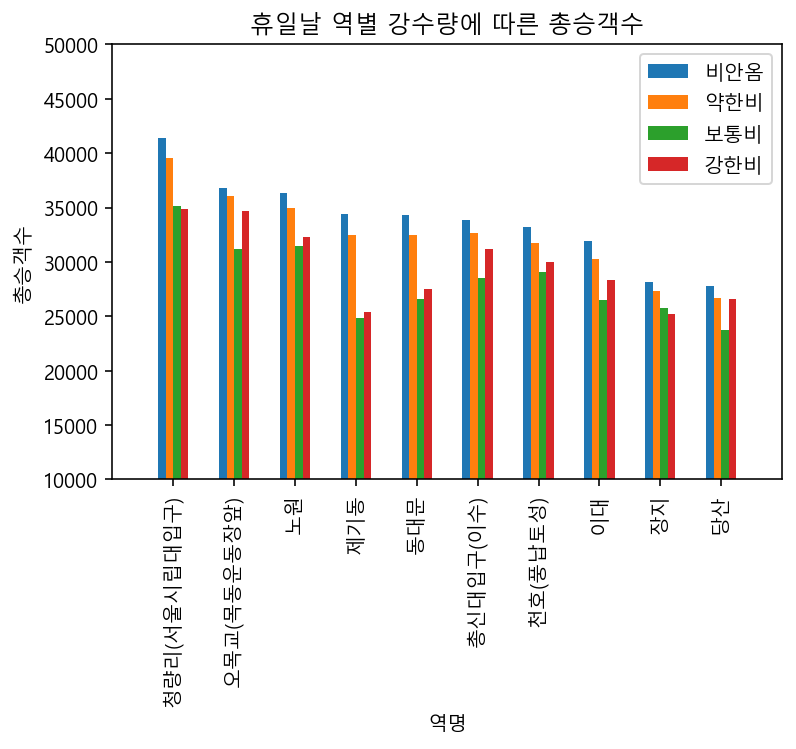

In [198]:
merge_df5 = merge_df_4.set_index('역명')
merge_df5[10:20].plot.bar()
plt.xlim([-1, 10])
plt.ylim([10000, 50000])
plt.ylabel("총승객수")
plt.title("휴일날 역별 강수량에 따른 총승객수")

(10000.0, 60000.0)

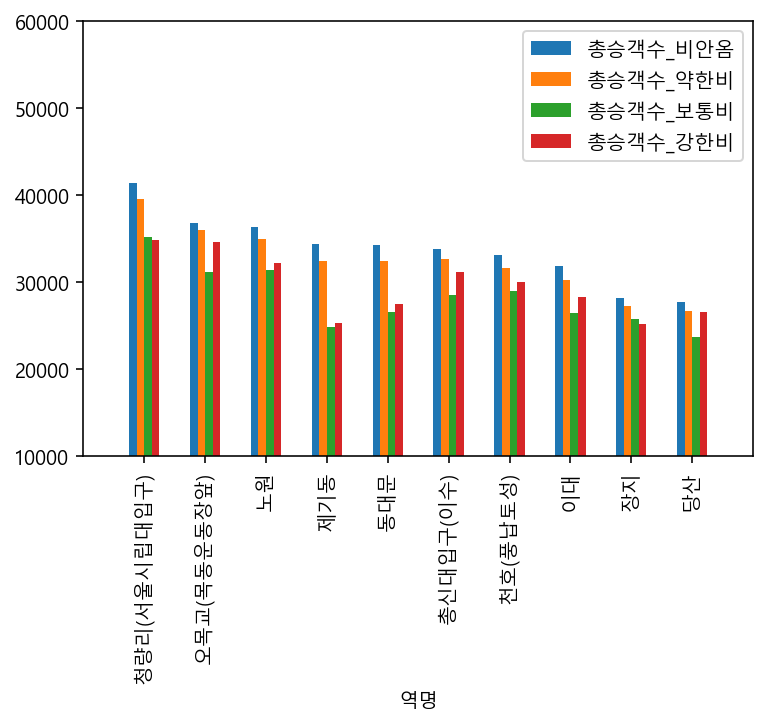

In [184]:
merge_df5 = merge_df_4.set_index('역명')
merge_df5[10:20].plot.bar()
plt.xlim([-1, 10])
plt.ylim([10000, 60000])

### 2개

In [368]:
merge_df = pd.merge(비안옴_g,강한비_g, on="역명")
#merge_df = pd.merge(merge_df,보통비_g, on="역명")
#merge_df = pd.merge(merge_df,강한비_g, on="역명")

In [369]:
merge_df5 = merge_df.set_index('역명')

(30000.0, 120000.0)

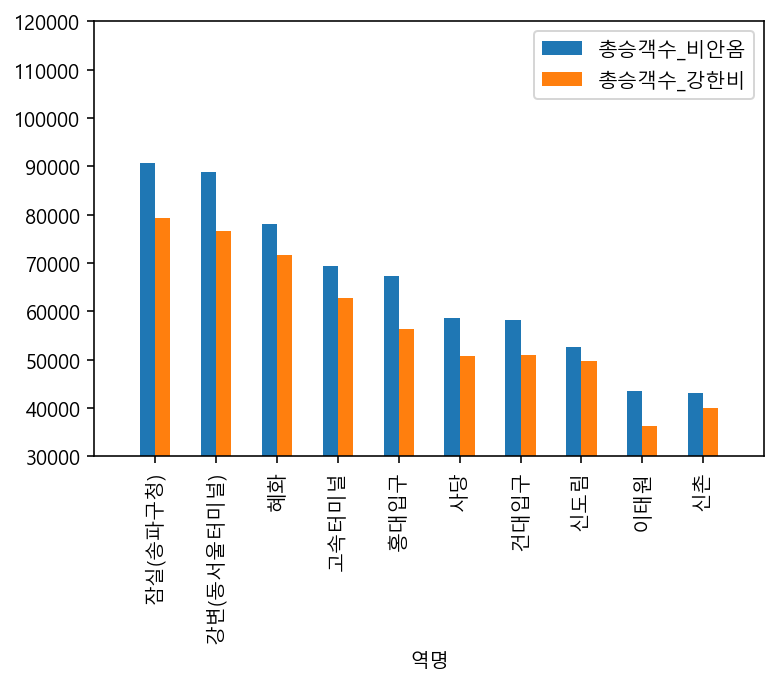

In [370]:
merge_df5[:10].plot.bar()
plt.xlim([-1, 10])
plt.ylim([30000, 120000])

### 전체 강수량

In [161]:
def rain(rainfall):
    if rainfall == 0:
        return '비 안옴'
    elif rainfall < 20:
        return '약한 비'
    elif rainfall > 20 and rainfall < 50:
        return '보통 비'
    elif rainfall > 50:
        return '강한 비'
    

상업환승['1일우량'] = 상업환승['일강수량'].map(rain)

In [162]:
비안옴 = 상업환승[상업환승['1일우량'] == '비 안옴']
약한비 = 상업환승[상업환승['1일우량'] == '약한 비']
보통비 = 상업환승[상업환승['1일우량'] == '보통 비']
강한비 = 상업환승[상업환승['1일우량'] == '강한 비']

In [163]:
비안옴_g = 비안옴.groupby('역명').mean().reset_index()
약한비_g = 약한비.groupby('역명').mean().reset_index()
보통비_g = 보통비.groupby('역명').mean().reset_index()
강한비_g = 강한비.groupby('역명').mean().reset_index()

In [164]:
비안옴_g = 비안옴_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
비안옴_g = 비안옴_g.rename(columns = {'총승객수':'총승객수_비안옴'})

In [165]:
약한비_g = 약한비_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
약한비_g = 약한비_g.rename(columns = {'총승객수':'총승객수_약한비'})

In [166]:
보통비_g = 보통비_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
보통비_g = 보통비_g.rename(columns = {'총승객수':'총승객수_보통비'})

In [167]:
강한비_g = 강한비_g[['역명', '총승객수']].sort_values('총승객수', ascending= False)
강한비_g = 강한비_g.rename(columns = {'총승객수':'총승객수_강한비'})

In [168]:
merge_df_4 = pd.merge(비안옴_g,약한비_g, on="역명")
merge_df_4 = pd.merge(merge_df_4,보통비_g, on="역명")
merge_df_4 = pd.merge(merge_df_4,강한비_g, on="역명")

(40000.0, 120000.0)

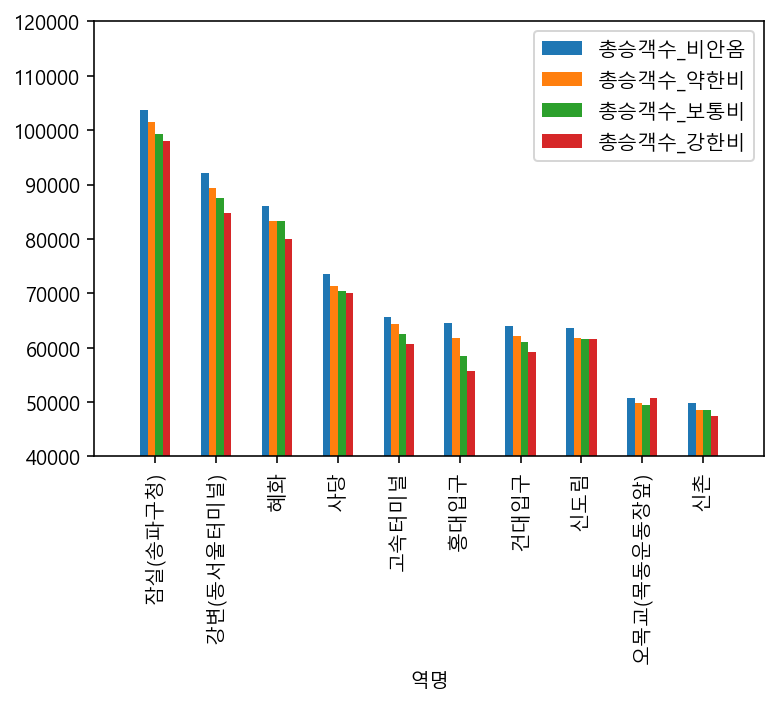

In [169]:
merge_df5 = merge_df_4.set_index('역명')
merge_df5[:10].plot.bar()
plt.xlim([-1, 10])
plt.ylim([40000, 120000])

(10000.0, 60000.0)

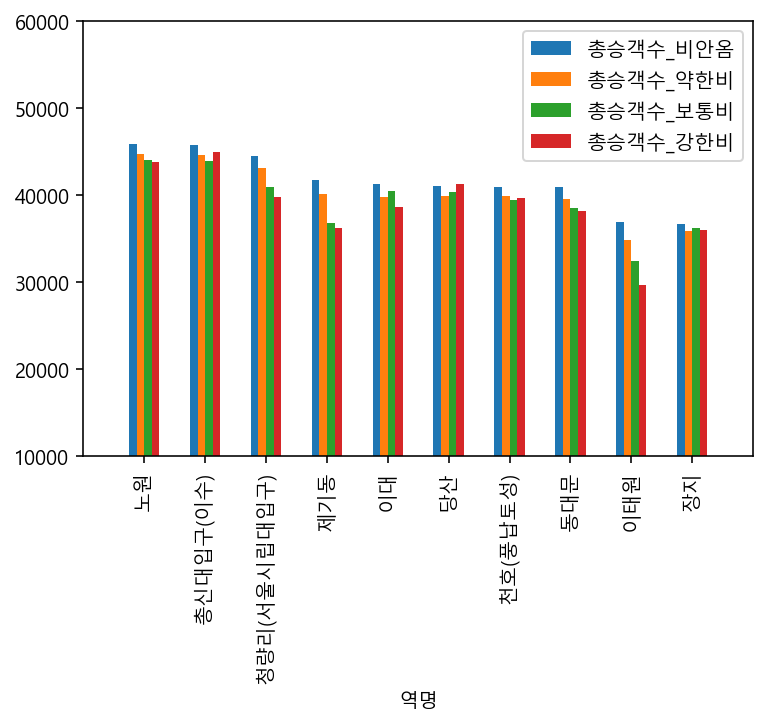

In [170]:
merge_df5 = merge_df_4.set_index('역명')
merge_df5[10:20].plot.bar()
plt.xlim([-1, 10])
plt.ylim([10000, 60000])

### 2개

In [171]:
merge_df = pd.merge(비안옴_g,강한비_g, on="역명")
#merge_df = pd.merge(merge_df,보통비_g, on="역명")
#merge_df = pd.merge(merge_df,강한비_g, on="역명")

In [172]:
merge_df5 = merge_df.set_index('역명')

(30000.0, 120000.0)

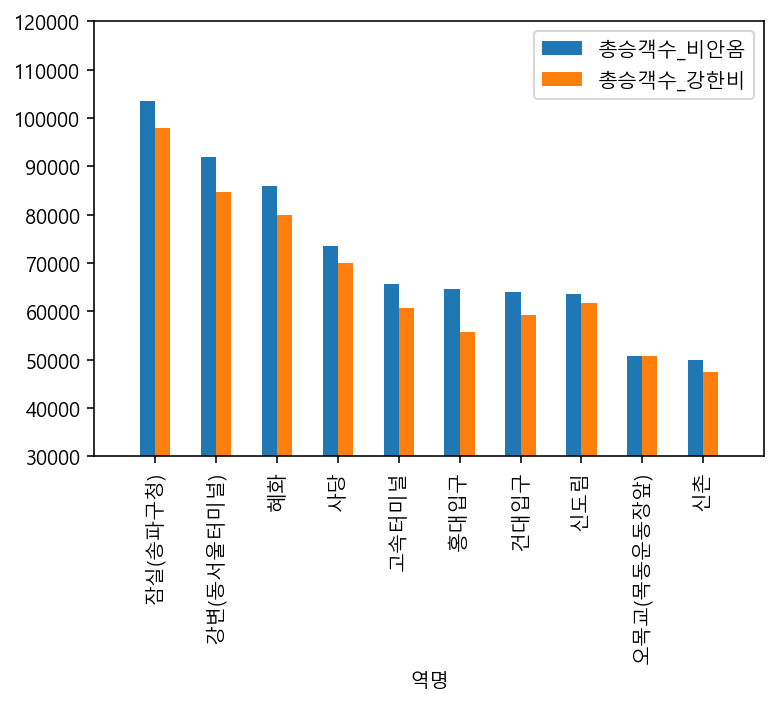

In [173]:
merge_df5[:10].plot.bar()
plt.xlim([-1, 10])
plt.ylim([30000, 120000])

In [42]:
df = pd.DataFrame({'3단계': [690000], '4단계':[790000]})

In [44]:
df = df.T

In [47]:
df = df.reset_index()

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

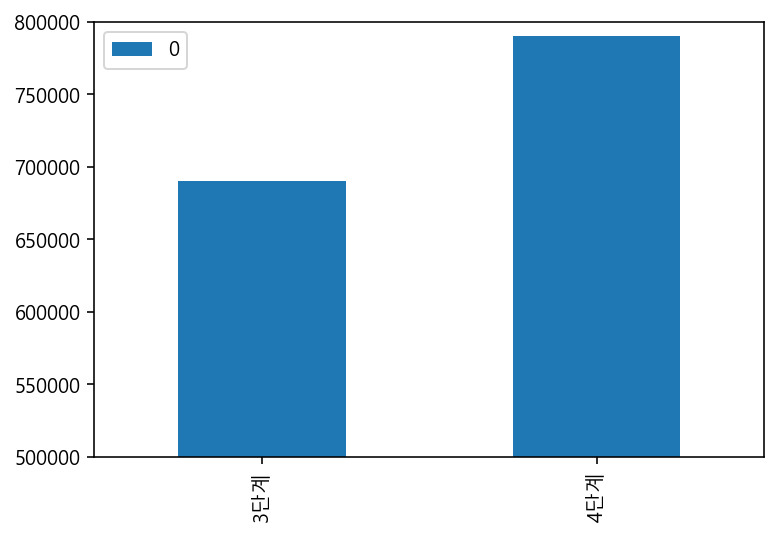

In [16]:
df.plot.bar()
plt.ylim([500000, 800000])
plt.xlabel

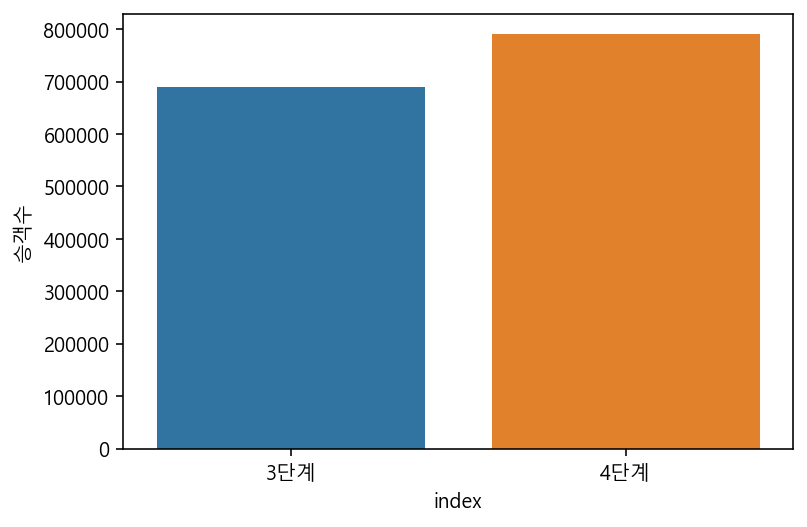

In [50]:
sns.barplot(data=df, x="index", y=0)
plt.ylabel("승객수")
plt.show()